### hua 20210612 exp end

In [22]:
# check for python verison
import os, sys

print(os.environ['LD_LIBRARY_PATH'])
print(sys.version)

/home/yhc/cuda/lib64:/usr/local/cuda-11.2/lib64
3.6.9 (default, Jan 26 2021, 15:33:00) 
[GCC 8.4.0]


In [23]:
# Check for using gpu
import tensorflow as tf

#print(tf.test.gpu_device_name())
#print(tf.test.is_gpu_available())
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [24]:
#training the kinetic energy for 1D Ising model, 1D RNN architecture, with the hyperparams
from TrainingRNN_1DTFIM import run_1DTFIM
'''
Exp 1-1
Setting all the hyperparams as paper as default
input: 
    numsteps = 1000               # number for training steps
    systemsize = 32, 64, 128      # number of spins
    Bx = +2                       # magnetic field 
    num_units = 40                # hidden later number
    num_layers = 1                # Since it is 1D RNN model
    numsamples = 50               # number for training sample
    learningrate = 5e-4           # learning rate for Gradient Descent
    seed = 111                    # total 25 different seeds
output: 
    RNNEnergy is a numpy array of the variational energy of the pRNN wavefunction
    varRNNEnergy is a numpy array of the variance of the variational energy of the pRNN wavefunction
Others:
    optimizer: Adam
    regular adjusting learning rate: no
    cell: tf.keras.layers.GRUCell # cooperated with the cell type that the paper used 
'''
RNNEnergy_32, varRNNEnergy_32 = run_1DTFIM(RNNtype = 1, activationType = 0, numsteps = 1000, systemsize = 32, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)


cell type:  <class 'tensorflow.python.keras.layers.recurrent.GRUCell'>
activation Functions <function elu at 0x7f9b18e7d950>
mean(E): -62.47886888943563, var(E): 28.589968573478686, #samples 50, #Step 0 


mean(E): -64.49560088097027, var(E): 24.25647739455357, #samples 50, #Step 10 


mean(E): -65.28720973125783, var(E): 20.347319620549094, #samples 50, #Step 20 


mean(E): -66.42310196024415, var(E): 25.01006743071451, #samples 50, #Step 30 


mean(E): -66.28383216343889, var(E): 16.15694305405063, #samples 50, #Step 40 


mean(E): -66.22534905236209, var(E): 14.054082174887386, #samples 50, #Step 50 


mean(E): -66.34843585802555, var(E): 7.847946092368858, #samples 50, #Step 60 




KeyboardInterrupt: 

In [ ]:
# 1D Ising model, 1D RNN cell
# spin number = 64
RNNEnergy_64, varRNNEnergy_64 = run_1DTFIM(RNNtype = 1, activationType = 0, numsteps = 1000, systemsize = 64, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)

In [ ]:
# 1D Ising model, 1D RNN cell
# spin number = 128
RNNEnergy_128, varRNNEnergy_128 = run_1DTFIM(RNNtype = 1, activationType = 0, numsteps = 1000, systemsize = 128, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)

In [ ]:
# 1D Ising model, 1D RNN cell
# spin number = 256
RNNEnergy_256, varRNNEnergy_256 = run_1DTFIM(RNNtype = 1, activationType = 0, numsteps = 1000, systemsize = 256, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)

In [ ]:
import numpy as np
#Computing the ground state energy by taking average over the last 100 iterations
numsamples = 50
print("Ground state energy for RNNEnergy_32=", np.mean(RNNEnergy_32[-2000:]), "+-", np.sqrt(np.max(varRNNEnergy_32[-2000:])/(numsamples*2000))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
min_RNNEnergy_32 = min(RNNEnergy_32)
print("min(RNNEnergy_32) =",min_RNNEnergy_32)
print("\n")

print("Ground state energy for RNNEnergy_64=", np.mean(RNNEnergy_64[-2000:]), "+-", np.sqrt(np.max(varRNNEnergy_64[-2000:])/(numsamples*2000))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
min_RNNEnergy_64 = min(RNNEnergy_64)
print("min(RNNEnergy_64) =",min_RNNEnergy_64)
print("\n")

print("Ground state energy for RNNEnergy_128=", np.mean(RNNEnergy_128[-2000:]), "+-", np.sqrt(np.max(varRNNEnergy_128[-2000:])/(numsamples*2000))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
min_RNNEnergy_128 = min(RNNEnergy_128)
print("min(RNNEnergy_128) =",min_RNNEnergy_128)
print("\n")

print("Ground state energy for RNNEnergy_256=", np.mean(RNNEnergy_256[-2000:]), "+-", np.sqrt(np.max(varRNNEnergy_256[-2000:])/(numsamples*2000))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
min_RNNEnergy_256 = min(RNNEnergy_256)
print("min(RNNEnergy_256) =",min_RNNEnergy_256)
print("\n")

### 實驗1-1、duplicate 論文model，實驗結果圖

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
'''
rcParams['axes.labelsize']  = 40 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 30
rcParams['legend.fontsize'] = 15
rcParams['xtick.labelsize'] = 25
rcParams['ytick.labelsize'] = 25
'''

In [ ]:
# 三種spin number的能量震盪收斂圖
rcParams['axes.labelsize']  = 40 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 30
rcParams['legend.fontsize'] = 13
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15

       
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(1, len(RNNEnergy_32)+1), RNNEnergy_32, "vy--", label="Variational energy of the 1D RNN, 32 spins")
ax.set_xlabel(r'Training step', fontsize = 18)
ax.set_ylabel('Predicted local Energy', fontsize = 18)
ax.set_xscale('log')
plt.legend()
plt.show()
print("\n")

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(1, len(RNNEnergy_64)+1), RNNEnergy_64, "oc-", label="Variational energy of the 1D RNN, 64 spins")
ax.set_xlabel(r'Training step', fontsize = 18)
ax.set_ylabel('Predicted local Energy', fontsize = 18)
ax.set_xscale('log')
plt.legend()
plt.show()
print("\n")

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(1, len(RNNEnergy_128)+1), RNNEnergy_128, "sg:",label="Variational energy of the 1D RNN, 128 spins")
ax.set_xlabel(r'Training step', fontsize = 18)
ax.set_ylabel('Predicted local Energy', fontsize = 18)
ax.set_xscale('log')
plt.legend()
plt.show()
print("\n")

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(1, len(RNNEnergy_256)+1), RNNEnergy_256, "^r-.",label="Variational energy of the 1D RNN, 256 spins")
ax.set_xlabel(r'Training step', fontsize = 18)
ax.set_ylabel('Predicted local Energy', fontsize = 18)
ax.set_xscale('log')
plt.legend()
plt.show()
print("\n")

In [ ]:
rcParams['axes.labelsize']  = 40 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 30
rcParams['legend.fontsize'] = 23 # 圖標的大小
rcParams['xtick.labelsize'] = 25
rcParams['ytick.labelsize'] = 25


    
fig, ax = plt.subplots(figsize=(30,10))
ax.plot(np.arange(1, len(RNNEnergy_32)+1), (RNNEnergy_32-min_RNNEnergy_32)/32, "vy--", label="Variational energy of the 1D RNN, 32 spins")
ax.plot(np.arange(1, len(RNNEnergy_64)+1), (RNNEnergy_64-min_RNNEnergy_64)/64, "oc-", label="Variational energy of the 1D RNN, 64 spins")
ax.plot(np.arange(1, len(RNNEnergy_128)+1), (RNNEnergy_128-min_RNNEnergy_128)/128, "sg:", label="Variational energy of the 1D RNN, 128 spins")
ax.plot(np.arange(1, len(RNNEnergy_256)+1), (RNNEnergy_256-min_RNNEnergy_256)/256, "^r-.", label="Variational energy of the 1D RNN, 256 spins")
ax.set_xlabel(r'Training step', fontsize = 25)
#ax.set_xscale('log')
ax.set_ylabel('(residual energy)/N', fontsize = 25)
ax.set_yscale('log')
plt.legend()
plt.show()
print("\n")

In [ ]:
# Variacnce plot
# spin = 32, 64, 128, 256
rcParams['axes.labelsize']  = 40 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 30
rcParams['legend.fontsize'] = 28 # 圖標的大小
rcParams['xtick.labelsize'] = 25
rcParams['ytick.labelsize'] = 25


fig, ax = plt.subplots(figsize=(30,10))
ax.semilogy(np.arange(1, len(RNNEnergy_32)+1),  varRNNEnergy_32, "vy--",  label="Energy variance of the RNN for 32 spins")
ax.semilogy(np.arange(1, len(RNNEnergy_64)+1),  varRNNEnergy_64, "oc-",  label="Energy variance of the RNN for 64 spins")
ax.semilogy(np.arange(1, len(RNNEnergy_128)+1), varRNNEnergy_128, "sg:", label="Energy variance of the RNN for 128 spins")
ax.semilogy(np.arange(1, len(RNNEnergy_256)+1), varRNNEnergy_256, "^r-.", label="Energy variance of the RNN for 256 spins")
ax.set_xlabel(r'Training step', fontsize = 25)
ax.set_ylabel('Energy variance', fontsize = 25)
plt.legend()
plt.show()
print("\n")



## 實驗1-2、調整cell type, 調整超參數，結果圖

### 實驗1-2-1、32 spins, 1000 annealing step

* 依據我自己的理解，大概看了一下keras裡面可以用的RNN相關的cell，並使用了下面三種：
* RNNcells = [
        tf.keras.layers.SimpleRNNCell,
        tf.keras.layers.GRUCell,
        tf.keras.layers.LSTMCell,
]

* activation function的部分有先測試過下面這麼多種：
    activationFunctions = [
        v tf.nn.elu,
        v tf.keras.activations.elu,
        v tf.keras.activations.relu,
        x tf.keras.activations.deserialize,
        v tf.keras.activations.exponential,
        x tf.keras.activations.hard_sigmoid,
        x tf.keras.activations.selu,
        x tf.keras.activations.sigmoid,
        v tf.keras.activations.softsign
    ]
* 除了原本的（tf.keras.activations.elu, ）外，挑除其中四種表現比較好的：
    activationFunctions = [
        tf.keras.activations.elu, 
        tf.keras.activations.relu,
        tf.keras.activations.exponential,
        tf.keras.activations.sigmoid
    ]
* 實作作法：
    * 先讓3種cell與5種activation Functions做搭配，找出每種cell最適合的activation function後
    * 再做一張所有cell與其最好的activation Functions一起比較的圖

#### 1-2-1-1 SimpleRNNCell vs (activation Functions)

In [ ]:
import tensorflow as tf
from TrainingRNN_1DTFIM import run_1DTFIM
 
Energy_SimpRNN_elu, varEnergy_SimpRNN_elu                 = run_1DTFIM(RNNtype = 0, activationType = 0, numsteps = 100, systemsize = 32, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_SimpRNN_relu, varEnergy_SimpRNN_relu               = run_1DTFIM(RNNtype = 0, activationType = 1, numsteps = 100, systemsize = 32, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_SimpRNN_exponential, varEnergy_SimpRNN_exponential = run_1DTFIM(RNNtype = 0, activationType = 2, numsteps = 100, systemsize = 32, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_SimpRNN_sigmoid, varEnergy_SimpRNN_sigmoid         = run_1DTFIM(RNNtype = 0, activationType = 3, numsteps = 100, systemsize = 32, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)


In [ ]:
# Simple RNN cell      
import numpy as np
min_Energy_SimpRNN_elu = min(Energy_SimpRNN_elu)
print('min_Energy_SimpRNN_elu', min_Energy_SimpRNN_elu)
print('\n')

min_Energy_SimpRNN_relu = min(Energy_SimpRNN_relu)
print('min_Energy_SimpRNN_relu', min_Energy_SimpRNN_relu)
print('\n')

min_Energy_SimpRNN_exponential = min(Energy_SimpRNN_exponential)
print('min_Energy_SimpRNN_exponential', min_Energy_SimpRNN_exponential)
print('\n')

min_Energy_SimpRNN_sigmoid = min(Energy_SimpRNN_sigmoid)
print('min_Energy_SimpRNN_sigmoid', min_Energy_SimpRNN_sigmoid)
print('\n')
print('best: Energy_SimpRNN_sigmoid')

#### 1-2-1-2 GRUCell vs (activation Functions)

In [ ]:
import tensorflow as tf
from TrainingRNN_1DTFIM import run_1DTFIM

Energy_GRUCell_elu, varEnergy_GRUCell_elu                 = run_1DTFIM(RNNtype = 1, activationType = 0, numsteps = 100, systemsize = 32, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_GRUCell_relu, varEnergy_GRUCell_relu               = run_1DTFIM(RNNtype = 1, activationType = 1, numsteps = 100, systemsize = 32, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_GRUCell_exponential, varEnergy_GRUCell_exponential = run_1DTFIM(RNNtype = 1, activationType = 2, numsteps = 100, systemsize = 32, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_GRUCell_sigmoid, varEnergy_GRUCell_sigmoid         = run_1DTFIM(RNNtype = 1, activationType = 3, numsteps = 100, systemsize = 32, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)


In [ ]:
# GRUCell cell      
import numpy as np

min_Energy_GRUCell_elu = min(Energy_GRUCell_elu)
print('min_Energy_GRUCell_elu', min_Energy_GRUCell_elu)
print('\n')

min_Energy_GRUCell_relu = min(Energy_GRUCell_relu)
print('min_Energy_GRUCell_relu', min_Energy_GRUCell_relu)
print('\n')

min_Energy_GRUCell_exponential = min(Energy_GRUCell_exponential)
print('min_Energy_GRUCell_exponential', min_Energy_GRUCell_exponential)
print('\n')

min_Energy_GRUCell_sigmoid = min(Energy_GRUCell_sigmoid)
print('min_Energy_GRUCell_sigmoid', min_Energy_GRUCell_sigmoid)
print('\n')

print('best: Energy_GRUCell_relu')

#### 1-2-1-3 LSTMCell vs (activation Functions)

In [ ]:
import tensorflow as tf
from TrainingRNN_1DTFIM import run_1DTFIM

Energy_LSTMCell_elu, varEnergy_LSTMCell_elu                 = run_1DTFIM(RNNtype = 2, activationType = 0, numsteps = 100, systemsize = 32, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_LSTMCell_relu, varEnergy_LSTMCell_relu               = run_1DTFIM(RNNtype = 2, activationType = 1, numsteps = 100, systemsize = 32, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_LSTMCell_exponential, varEnergy_LSTMCell_exponential = run_1DTFIM(RNNtype = 2, activationType = 2, numsteps = 100, systemsize = 32, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_LSTMCell_sigmoid, varEnergy_LSTMCell_sigmoid         = run_1DTFIM(RNNtype = 2, activationType = 3, numsteps = 100, systemsize = 32, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)


In [ ]:
# LSTMCell cell      
import numpy as np

min_Energy_LSTMCell_elu = min(Energy_LSTMCell_elu)
print('min_Energy_LSTMCell_elu', min_Energy_LSTMCell_elu)
print('\n')

min_Energy_LSTMCell_relu = min(Energy_LSTMCell_relu)
print('min_Energy_LSTMCell_relu', min_Energy_LSTMCell_relu)
print('\n')

min_Energy_LSTMCell_exponential = min(Energy_LSTMCell_exponential)
print('min_Energy_LSTMCell_exponential', min_Energy_LSTMCell_exponential)
print('\n')

min_Energy_LSTMCell_sigmoid = min(Energy_LSTMCell_sigmoid)
print('min_Energy_LSTMCell_sigmoid', min_Energy_LSTMCell_sigmoid)
print('\n')
print('best: min_Energy_LSTMCell_exponential')

### 實驗1-2-1 結果圖

In [ ]:
Energy_SimpRNN_sigmoid, varEnergy_SimpRNN_sigmoid           = run_1DTFIM(RNNtype = 0, activationType = 3, numsteps = 1000, systemsize = 32, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_GRUCell_relu, varEnergy_GRUCell_relu                 = run_1DTFIM(RNNtype = 1, activationType = 1, numsteps = 1000, systemsize = 32, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_LSTMCell_exponential, varEnergy_LSTMCell_exponential = run_1DTFIM(RNNtype = 2, activationType = 2, numsteps = 1000, systemsize = 32, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 能量震盪收斂圖
rcParams['axes.labelsize']  = 20 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 30
rcParams['legend.fontsize'] = 28
rcParams['xtick.labelsize'] = 25
rcParams['ytick.labelsize'] = 25

      
fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(np.arange(1, len(Energy_SimpRNN_sigmoid)+1), Energy_SimpRNN_sigmoid, "vy--", label="SimpleRNN_sigmoid")
ax.plot(np.arange(1, len(Energy_GRUCell_relu)+1), Energy_GRUCell_relu, "oc-",  label="GRUCell_relu")
ax.plot(np.arange(1, len(Energy_LSTMCell_exponential)+1), Energy_LSTMCell_exponential, "sg:", label="LSTMCell_exponential")

plt.title("Energy prediction: 32 spins, 1D RNN model", fontsize = 36)
ax.set_xlabel(r'Training step', fontsize = 25)
ax.set_ylabel('Predicted local Energy', fontsize = 25)
ax.set_xscale('log')
plt.legend()
plt.show()
print("\n")

In [ ]:
# Variacnce plot
# spin = 32, 64, 128, 256
rcParams['axes.labelsize']  = 40 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 30
rcParams['legend.fontsize'] = 28 # 圖標的大小
rcParams['xtick.labelsize'] = 25
rcParams['ytick.labelsize'] = 25


fig, ax = plt.subplots(figsize=(30,10))
ax.semilogy(np.arange(1, len(Energy_SimpRNN_sigmoid)+1),  varEnergy_SimpRNN_sigmoid, "vy--",  label="SimpleRNN vs sigmoid")
ax.semilogy(np.arange(1, len(Energy_GRUCell_relu)+1),  varEnergy_GRUCell_relu, "oc-",  label="GRUCell vs relu")
ax.semilogy(np.arange(1, len(Energy_LSTMCell_exponential)+1), varEnergy_LSTMCell_exponential, "sg:", label="LSTMCell vs exponential")

plt.title("Energy variance: 32 spins, 1D RNN model", fontsize = 36)
ax.set_xlabel(r'Training step', fontsize = 25)
ax.set_ylabel('Energy variance', fontsize = 25)
plt.legend()
plt.show()
print("\n")



In [ ]:
#Computing the ground state energy by taking average over the last 200 iterations
numsamples = 50
print('Use Ground state energy to find the best model:')
print("Energy_SimpRNN_sigmoid      = ", np.mean(Energy_SimpRNN_sigmoid[-200:]), "+-", np.sqrt(np.max(varEnergy_SimpRNN_sigmoid[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_GRUCell_relu         = ", np.mean(Energy_GRUCell_relu[-200:]), "+-", np.sqrt(np.max(varEnergy_GRUCell_relu[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_LSTMCell_exponential = ", np.mean(Energy_LSTMCell_exponential[-200:]), "+-", np.sqrt(np.max(varEnergy_LSTMCell_exponential[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error

print("Best model for 32 spins: Energy_GRUCell_relu")

### 實驗1-2-2、64 spins, 1000 annealing step

#### 1-2-2-1 SimpRNN vs (activation Functions)

In [ ]:
import tensorflow as tf
from TrainingRNN_1DTFIM import run_1DTFIM
 
Energy_SimpRNN_elu, varEnergy_SimpRNN_elu                 = run_1DTFIM(RNNtype = 0, activationType = 0, numsteps = 100, systemsize = 64, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_SimpRNN_relu, varEnergy_SimpRNN_relu               = run_1DTFIM(RNNtype = 0, activationType = 1, numsteps = 100, systemsize = 64, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_SimpRNN_exponential, varEnergy_SimpRNN_exponential = run_1DTFIM(RNNtype = 0, activationType = 2, numsteps = 100, systemsize = 64, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_SimpRNN_sigmoid, varEnergy_SimpRNN_sigmoid         = run_1DTFIM(RNNtype = 0, activationType = 3, numsteps = 100, systemsize = 64, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)


In [ ]:
# Simple RNN cell      
import numpy as np
min_Energy_SimpRNN_elu = min(Energy_SimpRNN_elu)
print('min_Energy_SimpRNN_elu', min_Energy_SimpRNN_elu)
print('\n')

min_Energy_SimpRNN_relu = min(Energy_SimpRNN_relu)
print('min_Energy_SimpRNN_relu', min_Energy_SimpRNN_relu)
print('\n')

min_Energy_SimpRNN_exponential = min(Energy_SimpRNN_exponential)
print('min_Energy_SimpRNN_exponential', min_Energy_SimpRNN_exponential)
print('\n')

min_Energy_SimpRNN_sigmoid = min(Energy_SimpRNN_sigmoid)
print('min_Energy_SimpRNN_sigmoid', min_Energy_SimpRNN_sigmoid)
print('\n')
print('best: Energy_SimpRNN_elu')

#### 1-2-2-2 GRUCell vs (activation Functions)

In [ ]:
import tensorflow as tf
from TrainingRNN_1DTFIM import run_1DTFIM

Energy_GRUCell_elu, varEnergy_GRUCell_elu                 = run_1DTFIM(RNNtype = 1, activationType = 0, numsteps = 100, systemsize = 64, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_GRUCell_relu, varEnergy_GRUCell_relu               = run_1DTFIM(RNNtype = 1, activationType = 1, numsteps = 100, systemsize = 64, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_GRUCell_exponential, varEnergy_GRUCell_exponential = run_1DTFIM(RNNtype = 1, activationType = 2, numsteps = 100, systemsize = 64, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_GRUCell_sigmoid, varEnergy_GRUCell_sigmoid         = run_1DTFIM(RNNtype = 1, activationType = 3, numsteps = 100, systemsize = 64, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)


In [ ]:
# GRUCell cell      
import numpy as np

min_Energy_GRUCell_elu = min(Energy_GRUCell_elu)
print('min_Energy_GRUCell_elu', min_Energy_GRUCell_elu)
print('\n')

min_Energy_GRUCell_relu = min(Energy_GRUCell_relu)
print('min_Energy_GRUCell_relu', min_Energy_GRUCell_relu)
print('\n')

min_Energy_GRUCell_exponential = min(Energy_GRUCell_exponential)
print('min_Energy_GRUCell_exponential', min_Energy_GRUCell_exponential)
print('\n')

min_Energy_GRUCell_sigmoid = min(Energy_GRUCell_sigmoid)
print('min_Energy_GRUCell_sigmoid', min_Energy_GRUCell_sigmoid)
print('\n')

print('best: Energy_GRUCell_sigmoid')

#### 1-2-2-3 LSTMCell vs (activation Functions)

In [ ]:
import tensorflow as tf
from TrainingRNN_1DTFIM import run_1DTFIM

Energy_LSTMCell_elu, varEnergy_LSTMCell_elu                 = run_1DTFIM(RNNtype = 2, activationType = 0, numsteps = 100, systemsize = 64, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_LSTMCell_relu, varEnergy_LSTMCell_relu               = run_1DTFIM(RNNtype = 2, activationType = 1, numsteps = 100, systemsize = 64, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_LSTMCell_exponential, varEnergy_LSTMCell_exponential = run_1DTFIM(RNNtype = 2, activationType = 2, numsteps = 100, systemsize = 64, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_LSTMCell_sigmoid, varEnergy_LSTMCell_sigmoid         = run_1DTFIM(RNNtype = 2, activationType = 3, numsteps = 100, systemsize = 64, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)


In [ ]:
# LSTMCell cell      
import numpy as np

min_Energy_LSTMCell_elu = min(Energy_LSTMCell_elu)
print('min_Energy_LSTMCell_elu', min_Energy_LSTMCell_elu)
print('\n')

min_Energy_LSTMCell_relu = min(Energy_LSTMCell_relu)
print('min_Energy_LSTMCell_relu', min_Energy_LSTMCell_relu)
print('\n')

min_Energy_LSTMCell_exponential = min(Energy_LSTMCell_exponential)
print('min_Energy_LSTMCell_exponential', min_Energy_LSTMCell_exponential)
print('\n')

min_Energy_LSTMCell_sigmoid = min(Energy_LSTMCell_sigmoid)
print('min_Energy_LSTMCell_sigmoid', min_Energy_LSTMCell_sigmoid)
print('\n')
print('best: Energy_LSTMCell_sigmoid')

### 實驗1-2-2 結果圖

In [ ]:
Energy_SimpRNN_elu, varEnergy_SimpRNN_elu                 = run_1DTFIM(RNNtype = 0, activationType = 0, numsteps = 1000, systemsize = 64, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_GRUCell_sigmoid, varEnergy_GRUCell_sigmoid         = run_1DTFIM(RNNtype = 1, activationType = 3, numsteps = 1000, systemsize = 64, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_LSTMCell_sigmoid, varEnergy_LSTMCell_sigmoid       = run_1DTFIM(RNNtype = 2, activationType = 3, numsteps = 1000, systemsize = 64, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 能量震盪收斂圖
rcParams['axes.labelsize']  = 20 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 30
rcParams['legend.fontsize'] = 28
rcParams['xtick.labelsize'] = 25
rcParams['ytick.labelsize'] = 25

      
fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(np.arange(1, len(Energy_SimpRNN_elu)+1), Energy_SimpRNN_elu, "vb--", label="SimpleRNN_elu")
ax.plot(np.arange(1, len(Energy_GRUCell_sigmoid)+1), Energy_GRUCell_sigmoid, "om-",  label="GRUCell_sigmoid")
ax.plot(np.arange(1, len(Energy_LSTMCell_sigmoid)+1), Energy_LSTMCell_sigmoid, "sr:", label="STMCell_sigmoid")

plt.title("Energy prediction: 64 spins, 1D RNN model", fontsize = 36)
ax.set_xlabel(r'Training step', fontsize = 25)
ax.set_ylabel('Predicted local Energy', fontsize = 25)
ax.set_xscale('log')
plt.legend()
plt.show()
print("\n")

In [ ]:
# Variacnce plot
# spin = 32, 64, 128, 256
rcParams['axes.labelsize']  = 40 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 30
rcParams['legend.fontsize'] = 28 # 圖標的大小
rcParams['xtick.labelsize'] = 25
rcParams['ytick.labelsize'] = 25


fig, ax = plt.subplots(figsize=(30,10))
ax.semilogy(np.arange(1, len(Energy_SimpRNN_elu)+1),  varEnergy_SimpRNN_elu, "vb--",  label="SimpleRNN vs elu")
ax.semilogy(np.arange(1, len(Energy_GRUCell_sigmoid)+1),  varEnergy_GRUCell_sigmoid, "om-",  label="GRUCell vs sigmoid")
ax.semilogy(np.arange(1, len(Energy_LSTMCell_sigmoid)+1), varEnergy_LSTMCell_sigmoid, "sr:", label="LSTMCell vs sigmoid")

plt.title("Energy variance: 64 spins, 1D RNN model", fontsize = 36)
ax.set_xlabel(r'Training step', fontsize = 25)
ax.set_ylabel('Energy variance', fontsize = 25)
plt.legend()
plt.show()
print("\n")



In [ ]:
#Computing the ground state energy by taking average over the last 100 iterations
numsamples = 50
print('Use Ground state energy to find the best model:')
print("Energy_SimpRNN_elu         = ", np.mean(Energy_SimpRNN_elu[-200:]), "+-", np.sqrt(np.max(varEnergy_SimpRNN_elu[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_GRUCell_sigmoid     = ", np.mean(Energy_GRUCell_sigmoid[-200:]), "+-", np.sqrt(np.max(varEnergy_GRUCell_sigmoid[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_LSTMCell_sigmoid    = ", np.mean(Energy_LSTMCell_sigmoid[-200:]), "+-", np.sqrt(np.max(varEnergy_LSTMCell_sigmoid[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error

print("Best model for 64 spins: Energy_GRUCell_sigmoid")

### 實驗1-2-3、128 spins, 1000 annealing step

#### 1-2-3-1 SimpRNN vs (activation Functions)

In [ ]:
import tensorflow as tf
from TrainingRNN_1DTFIM import run_1DTFIM
 
Energy_SimpRNN_elu, varEnergy_SimpRNN_elu                 = run_1DTFIM(RNNtype = 0, activationType = 0, numsteps = 100, systemsize = 128, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_SimpRNN_relu, varEnergy_SimpRNN_relu               = run_1DTFIM(RNNtype = 0, activationType = 1, numsteps = 100, systemsize = 128, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_SimpRNN_exponential, varEnergy_SimpRNN_exponential = run_1DTFIM(RNNtype = 0, activationType = 2, numsteps = 100, systemsize = 128, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_SimpRNN_sigmoid, varEnergy_SimpRNN_sigmoid         = run_1DTFIM(RNNtype = 0, activationType = 3, numsteps = 100, systemsize = 128, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)


In [ ]:
# Simple RNN cell      
import numpy as np
min_Energy_SimpRNN_elu = min(Energy_SimpRNN_elu)
print('min_Energy_SimpRNN_elu', min_Energy_SimpRNN_elu)
print('\n')

min_Energy_SimpRNN_relu = min(Energy_SimpRNN_relu)
print('min_Energy_SimpRNN_relu', min_Energy_SimpRNN_relu)
print('\n')

min_Energy_SimpRNN_exponential = min(Energy_SimpRNN_exponential)
print('min_Energy_SimpRNN_exponential', min_Energy_SimpRNN_exponential)
print('\n')

min_Energy_SimpRNN_sigmoid = min(Energy_SimpRNN_sigmoid)
print('min_Energy_SimpRNN_sigmoid', min_Energy_SimpRNN_sigmoid)
print('\n')
print('best: Energy_SimpRNN_relu')

#### 1-2-3-2 GRUCell vs (activation Functions)

In [ ]:
import tensorflow as tf
from TrainingRNN_1DTFIM import run_1DTFIM

Energy_GRUCell_elu, varEnergy_GRUCell_elu                 = run_1DTFIM(RNNtype = 1, activationType = 0, numsteps = 100, systemsize = 128, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_GRUCell_relu, varEnergy_GRUCell_relu               = run_1DTFIM(RNNtype = 1, activationType = 1, numsteps = 100, systemsize = 128, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_GRUCell_exponential, varEnergy_GRUCell_exponential = run_1DTFIM(RNNtype = 1, activationType = 2, numsteps = 100, systemsize = 128, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_GRUCell_sigmoid, varEnergy_GRUCell_sigmoid         = run_1DTFIM(RNNtype = 1, activationType = 3, numsteps = 100, systemsize = 128, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)


In [ ]:
# GRUCell cell      
import numpy as np

min_Energy_GRUCell_elu = min(Energy_GRUCell_elu)
print('min_Energy_GRUCell_elu', min_Energy_GRUCell_elu)
print('\n')

min_Energy_GRUCell_relu = min(Energy_GRUCell_relu)
print('min_Energy_GRUCell_relu', min_Energy_GRUCell_relu)
print('\n')

min_Energy_GRUCell_exponential = min(Energy_GRUCell_exponential)
print('min_Energy_GRUCell_exponential', min_Energy_GRUCell_exponential)
print('\n')

min_Energy_GRUCell_sigmoid = min(Energy_GRUCell_sigmoid)
print('min_Energy_GRUCell_sigmoid', min_Energy_GRUCell_sigmoid)
print('\n')

print('best: Energy_GRUCell_sigmoid')

#### 1-2-3-3 LSTMCell vs (activation Functions)

In [ ]:
import tensorflow as tf
from TrainingRNN_1DTFIM import run_1DTFIM

Energy_LSTMCell_elu, varEnergy_LSTMCell_elu                 = run_1DTFIM(RNNtype = 2, activationType = 0, numsteps = 100, systemsize = 128, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_LSTMCell_relu, varEnergy_LSTMCell_relu               = run_1DTFIM(RNNtype = 2, activationType = 1, numsteps = 100, systemsize = 128, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_LSTMCell_exponential, varEnergy_LSTMCell_exponential = run_1DTFIM(RNNtype = 2, activationType = 2, numsteps = 100, systemsize = 128, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_LSTMCell_sigmoid, varEnergy_LSTMCell_sigmoid         = run_1DTFIM(RNNtype = 2, activationType = 3, numsteps = 100, systemsize = 128, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)


In [ ]:
# LSTMCell cell      
import numpy as np

min_Energy_LSTMCell_elu = min(Energy_LSTMCell_elu)
print('min_Energy_LSTMCell_elu', min_Energy_LSTMCell_elu)
print('\n')

min_Energy_LSTMCell_relu = min(Energy_LSTMCell_relu)
print('min_Energy_LSTMCell_relu', min_Energy_LSTMCell_relu)
print('\n')

min_Energy_LSTMCell_exponential = min(Energy_LSTMCell_exponential)
print('min_Energy_LSTMCell_exponential', min_Energy_LSTMCell_exponential)
print('\n')

min_Energy_LSTMCell_sigmoid = min(Energy_LSTMCell_sigmoid)
print('min_Energy_LSTMCell_sigmoid', min_Energy_LSTMCell_sigmoid)
print('\n')
print('best: Energy_LSTMCell_elu')

### 實驗1-2-3 結果圖

In [ ]:
Energy_SimpRNN_relu, varEnergy_SimpRNN_relu               = run_1DTFIM(RNNtype = 0, activationType = 1, numsteps = 1000, systemsize = 128, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_GRUCell_sigmoid, varEnergy_GRUCell_sigmoid         = run_1DTFIM(RNNtype = 1, activationType = 3, numsteps = 1000, systemsize = 128, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_LSTMCell_elu, varEnergy_LSTMCell_elu               = run_1DTFIM(RNNtype = 2, activationType = 0, numsteps = 1000, systemsize = 128, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 能量震盪收斂圖
rcParams['axes.labelsize']  = 20 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 30
rcParams['legend.fontsize'] = 28
rcParams['xtick.labelsize'] = 25
rcParams['ytick.labelsize'] = 25

      
fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(np.arange(1, len(Energy_SimpRNN_relu)+1), Energy_SimpRNN_relu, "vk--", label="SimpleRNN_relu")
ax.plot(np.arange(1, len(Energy_GRUCell_sigmoid)+1), Energy_GRUCell_sigmoid, "ob-",  label="GRUCell_sigmoid")
ax.plot(np.arange(1, len(Energy_LSTMCell_elu)+1), Energy_LSTMCell_elu, "sc:", label="STMCell_elu")

plt.title("Energy prediction: 128 spins, 1D RNN model", fontsize = 36)
ax.set_xlabel(r'Training step', fontsize = 25)
ax.set_ylabel('Predicted local Energy', fontsize = 25)
ax.set_xscale('log')
plt.legend()
plt.show()
print("\n")

In [ ]:
# Variacnce plot
# spin = 32, 64, 128, 256
rcParams['axes.labelsize']  = 40 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 30
rcParams['legend.fontsize'] = 28 # 圖標的大小
rcParams['xtick.labelsize'] = 25
rcParams['ytick.labelsize'] = 25


fig, ax = plt.subplots(figsize=(30,10))
ax.semilogy(np.arange(1, len(Energy_SimpRNN_relu)+1),  varEnergy_SimpRNN_relu, "vk--",  label="SimpleRNN vs relu")
ax.semilogy(np.arange(1, len(Energy_GRUCell_sigmoid)+1),  varEnergy_GRUCell_sigmoid, "ob-",  label="GRUCell vs sigmoid")
ax.semilogy(np.arange(1, len(Energy_LSTMCell_elu)+1), varEnergy_LSTMCell_elu, "sc:", label="LSTMCell vs elu")

plt.title("Energy variance: 128 spins, 1D RNN model", fontsize = 36)
ax.set_xlabel(r'Training step', fontsize = 25)
ax.set_ylabel('Energy variance', fontsize = 25)
plt.legend()
plt.show()
print("\n")



In [ ]:
#Computing the ground state energy by taking average over the last 100 iterations
numsamples = 50
print('Use Ground state energy to find the best model:')
print("Energy_SimpRNN_relu     = ", np.mean(Energy_SimpRNN_relu[-200:]), "+-", np.sqrt(np.max(varEnergy_SimpRNN_relu[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_GRUCell_sigmoid  = ", np.mean(Energy_GRUCell_sigmoid[-200:]), "+-", np.sqrt(np.max(varEnergy_GRUCell_sigmoid[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_LSTMCell_elu     = ", np.mean(Energy_LSTMCell_elu[-200:]), "+-", np.sqrt(np.max(varEnergy_LSTMCell_elu[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error

print("Best model for 128 spins: Energy_GRUCell_sigmoid")

### 實驗1-2-4、256 spins, 1000 annealing step

#### 1-2-4-1 SimpRNN vs (activation Functions)

In [ ]:
import tensorflow as tf
from TrainingRNN_1DTFIM import run_1DTFIM
 
Energy_SimpRNN_elu, varEnergy_SimpRNN_elu                 = run_1DTFIM(RNNtype = 0, activationType = 0, numsteps = 100, systemsize = 256, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_GRUCell_sigmoid, varEnergy_GRUCell_sigmoid         = run_1DTFIM(RNNtype = 0, activationType = 1, numsteps = 100, systemsize = 256, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_SimpRNN_exponential, varEnergy_SimpRNN_exponential = run_1DTFIM(RNNtype = 0, activationType = 2, numsteps = 100, systemsize = 256, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_SimpRNN_sigmoid, varEnergy_SimpRNN_sigmoid         = run_1DTFIM(RNNtype = 0, activationType = 3, numsteps = 100, systemsize = 256, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)


In [ ]:
# Simple RNN cell      
import numpy as np
min_Energy_SimpRNN_elu = min(Energy_SimpRNN_elu)
print('min_Energy_SimpRNN_elu', min_Energy_SimpRNN_elu)
print('\n')

min_Energy_SimpRNN_relu = min(Energy_SimpRNN_relu)
print('min_Energy_SimpRNN_relu', min_Energy_SimpRNN_relu)
print('\n')

min_Energy_SimpRNN_exponential = min(Energy_SimpRNN_exponential)
print('min_Energy_SimpRNN_exponential', min_Energy_SimpRNN_exponential)
print('\n')

min_Energy_SimpRNN_sigmoid = min(Energy_SimpRNN_sigmoid)
print('min_Energy_SimpRNN_sigmoid', min_Energy_SimpRNN_sigmoid)
print('\n')
print('best: min_Energy_SimpRNN_elu')

#### 1-2-4-2 GRUCell vs (activation Functions)

In [ ]:
import tensorflow as tf
from TrainingRNN_1DTFIM import run_1DTFIM

Energy_GRUCell_elu, varEnergy_GRUCell_elu                 = run_1DTFIM(RNNtype = 1, activationType = 0, numsteps = 100, systemsize = 256, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_GRUCell_relu, varEnergy_GRUCell_relu               = run_1DTFIM(RNNtype = 1, activationType = 1, numsteps = 100, systemsize = 256, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_GRUCell_exponential, varEnergy_GRUCell_exponential = run_1DTFIM(RNNtype = 1, activationType = 2, numsteps = 100, systemsize = 256, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_GRUCell_sigmoid, varEnergy_GRUCell_sigmoid         = run_1DTFIM(RNNtype = 1, activationType = 3, numsteps = 100, systemsize = 256, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)


In [ ]:
# GRUCell cell      
import numpy as np

min_Energy_GRUCell_elu = min(Energy_GRUCell_elu)
print('min_Energy_GRUCell_elu', min_Energy_GRUCell_elu)
print('\n')

min_Energy_GRUCell_relu = min(Energy_GRUCell_relu)
print('min_Energy_GRUCell_relu', min_Energy_GRUCell_relu)
print('\n')

min_Energy_GRUCell_exponential = min(Energy_GRUCell_exponential)
print('min_Energy_GRUCell_exponential', min_Energy_GRUCell_exponential)
print('\n')

min_Energy_GRUCell_sigmoid = min(Energy_GRUCell_sigmoid)
print('min_Energy_GRUCell_sigmoid', min_Energy_GRUCell_sigmoid)
print('\n')

print('best: Energy_GRUCell_relu')

#### 1-2-4-3 LSTMCell vs (activation Functions)

In [ ]:
import tensorflow as tf
from TrainingRNN_1DTFIM import run_1DTFIM

Energy_LSTMCell_elu, varEnergy_LSTMCell_elu                 = run_1DTFIM(RNNtype = 2, activationType = 0, numsteps = 100, systemsize = 256, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_LSTMCell_relu, varEnergy_LSTMCell_relu               = run_1DTFIM(RNNtype = 2, activationType = 1, numsteps = 100, systemsize = 256, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_LSTMCell_exponential, varEnergy_LSTMCell_exponential = run_1DTFIM(RNNtype = 2, activationType = 2, numsteps = 100, systemsize = 256, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_LSTMCell_sigmoid, varEnergy_LSTMCell_sigmoid         = run_1DTFIM(RNNtype = 2, activationType = 3, numsteps = 100, systemsize = 256, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)


In [ ]:
# LSTMCell cell      
import numpy as np

min_Energy_LSTMCell_elu = min(Energy_LSTMCell_elu)
print('min_Energy_LSTMCell_elu', min_Energy_LSTMCell_elu)
print('\n')

min_Energy_LSTMCell_relu = min(Energy_LSTMCell_relu)
print('min_Energy_LSTMCell_relu', min_Energy_LSTMCell_relu)
print('\n')

min_Energy_LSTMCell_exponential = min(Energy_LSTMCell_exponential)
print('min_Energy_LSTMCell_exponential', min_Energy_LSTMCell_exponential)
print('\n')

min_Energy_LSTMCell_sigmoid = min(Energy_LSTMCell_sigmoid)
print('min_Energy_LSTMCell_sigmoid', min_Energy_LSTMCell_sigmoid)
print('\n')
print('best: Energy_LSTMCell_elu')

### 實驗1-2-4 結果圖

In [ ]:
import tensorflow as tf
from TrainingRNN_1DTFIM import run_1DTFIM

Energy_SimpRNN_elu, varEnergy_SimpRNN_elu                 = run_1DTFIM(RNNtype = 0, activationType = 0, numsteps = 1000, systemsize = 256, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_GRUCell_relu, varEnergy_GRUCell_relu               = run_1DTFIM(RNNtype = 1, activationType = 1, numsteps = 1000, systemsize = 256, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_LSTMCell_elu, varEnergy_LSTMCell_elu               = run_1DTFIM(RNNtype = 2, activationType = 0, numsteps = 1000, systemsize = 256, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 能量震盪收斂圖
rcParams['axes.labelsize']  = 20 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 30
rcParams['legend.fontsize'] = 28
rcParams['xtick.labelsize'] = 25
rcParams['ytick.labelsize'] = 25

      
fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(np.arange(1, len(Energy_SimpRNN_elu)+1), Energy_SimpRNN_elu, "vm--", label="SimpleRNN_elu")
ax.plot(np.arange(1, len(Energy_GRUCell_relu)+1), Energy_GRUCell_relu, "oc-",  label="GRUCell_relu")
ax.plot(np.arange(1, len(Energy_LSTMCell_elu)+1), Energy_LSTMCell_elu, "sk:", label="STMCell_elu")

plt.title("Energy prediction: 256 spins, 1D RNN model", fontsize = 36)
ax.set_xlabel(r'Training step', fontsize = 25)
ax.set_ylabel('Predicted local Energy', fontsize = 25)
ax.set_xscale('log')
plt.legend()
plt.show()
print("\n")

In [ ]:
# Variacnce plot
# spin = 32, 64, 128, 256
rcParams['axes.labelsize']  = 40 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 30
rcParams['legend.fontsize'] = 28 # 圖標的大小
rcParams['xtick.labelsize'] = 25
rcParams['ytick.labelsize'] = 25


fig, ax = plt.subplots(figsize=(30,10))
ax.semilogy(np.arange(1, len(Energy_SimpRNN_elu)+1),  varEnergy_SimpRNN_elu, "vm--",  label="SimpleRNN vs elu")
ax.semilogy(np.arange(1, len(Energy_GRUCell_relu)+1),  varEnergy_GRUCell_relu, "oc-",  label="GRUCell vs relu")
ax.semilogy(np.arange(1, len(Energy_LSTMCell_elu)+1), varEnergy_LSTMCell_elu, "sk:", label="LSTMCell vs elu")

plt.title("Energy variance: 256 spins, 1D RNN model", fontsize = 36)
ax.set_xlabel(r'Training step', fontsize = 25)
ax.set_ylabel('Energy variance', fontsize = 25)
plt.legend()
plt.show()
print("\n")



In [ ]:
import numpy as np
#Computing the ground state energy by taking average over the last 100 iterations
numsamples = 50
print('Use Ground state energy to find the best model:')
print("Energy_SimpRNN_elu     = ", np.mean(Energy_SimpRNN_elu[-200:]), "+-", np.sqrt(np.max(varEnergy_SimpRNN_elu[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_GRUCell_relu    = ", np.mean(Energy_GRUCell_relu[-200:]), "+-", np.sqrt(np.max(varEnergy_GRUCell_relu[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_LSTMCell_elu    = ", np.mean(Energy_LSTMCell_elu[-200:]), "+-", np.sqrt(np.max(varEnergy_LSTMCell_elu[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error

print("Best model for 256 spins: Energy_GRUCell_relu")

## 實驗1-2 總結果：

In [ ]:
print("Best model for all cases at annealing step = 1000:")
print("32 spins: Energy_GRUCell_relu")
print("64 spins: Energy_GRUCell_sigmoid")
print("128 spins: Energy_GRUCell_sigmoid")
print("256 spins: Energy_GRUCell_relu")


## 實驗一：
### 1D Ising model, 1D RNN cell
### exp1-2-1: adjusting the different RNN cell
### spin number = 32

RNNcells = [
    tf.compat.v1.nn.rnn_cell.RNNCell,        0# Abstract method
    tf.compat.v1.nn.rnn_cell.BasicRNNCell,   1# CUDA_ERROR_NO_BINARY_FOR_GPU
    tf.compat.v1.nn.rnn_cell.MultiRNNCell,   2# cells must be a list or tuple, but saw: 10
    tf.compat.v1.nn.rnn_cell.GRUCell,        3# CUDA_ERROR_NO_BINARY_FOR_GPU
    tf.compat.v1.nn.rnn_cell.LSTMCell,       4# CUDA_ERROR_NO_BINARY_FOR_GPU
    tf.compat.v1.nn.rnn_cell.LSTMStateTuple, 5# __new__() missing 1 required positional argument: 'h'
    tf.compat.v1.nn.rnn_cell.BasicLSTMCell   6# CUDA_ERROR_NO_BINARY_FOR_GPU
]
        
* 實驗二：
* todo: 2D的model也都做一遍同樣的事情
    * 只是分別分為2D 1D RNN model, 2D 2D RNN model
    * 實驗1-2:
        * 這部分則是和 SA, SQA做比較的時候了
        * 分別比較出兩張圖：
        * solution quality and cost-time

## 實驗1-3、改變 learning rate與 #hidden unit

### 實驗1-3-1 改變lr與hidden units
* lr_original = 5e-4
* lr = [2e-4, 5e-4, 8e-4]
* hu_origianl = 40
* hu = [20, 40, 60]

### 實驗1-3-1-1 32 spins

In [ ]:
# This cell is: 32 number of spins with different lr and hu
# RNN cell type: GRUCell;
# activation function: relu

import tensorflow as tf
from TrainingRNN_1DTFIM import run_1DTFIM
# name: spin_lr_hu
# 32 spins, lr = 2e-4, hu = 20, 40, 60
Energy_32_2_20, varEnergy_32_2_20 = run_1DTFIM(RNNtype = 1, activationType = 1, numsteps = 1000, systemsize = 32, Bx = +2, num_units = 20, num_layers = 1, numsamples = 50, learningrate = 2e-4, seed = 111)
Energy_32_2_40, varEnergy_32_2_40 = run_1DTFIM(RNNtype = 1, activationType = 1, numsteps = 1000, systemsize = 32, Bx = +2, num_units = 40, num_layers = 1, numsamples = 50, learningrate = 2e-4, seed = 111)
Energy_32_2_60, varEnergy_32_2_60 = run_1DTFIM(RNNtype = 1, activationType = 1, numsteps = 1000, systemsize = 32, Bx = +2, num_units = 60, num_layers = 1, numsamples = 50, learningrate = 2e-4, seed = 111)

# 32 spins, lr = 5e-4, hu = 20, 40, 60
Energy_32_5_20, varEnergy_32_5_20 = run_1DTFIM(RNNtype = 1, activationType = 1, numsteps = 1000, systemsize = 32, Bx = +2, num_units = 20, num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_32_5_40, varEnergy_32_5_40 = run_1DTFIM(RNNtype = 1, activationType = 1, numsteps = 1000, systemsize = 32, Bx = +2, num_units = 40, num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_32_5_60, varEnergy_32_5_60 = run_1DTFIM(RNNtype = 1, activationType = 1, numsteps = 1000, systemsize = 32, Bx = +2, num_units = 60, num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)

# 32 spins, lr = 8e-4, hu = 20, 40, 60
Energy_32_8_20, varEnergy_32_8_20 = run_1DTFIM(RNNtype = 1, activationType = 1, numsteps = 1000, systemsize = 32, Bx = +2, num_units = 20, num_layers = 1, numsamples = 50, learningrate = 8e-4, seed = 111)
Energy_32_8_40, varEnergy_32_8_40 = run_1DTFIM(RNNtype = 1, activationType = 1, numsteps = 1000, systemsize = 32, Bx = +2, num_units = 40, num_layers = 1, numsamples = 50, learningrate = 8e-4, seed = 111)
Energy_32_8_60, varEnergy_32_8_60 = run_1DTFIM(RNNtype = 1, activationType = 1, numsteps = 1000, systemsize = 32, Bx = +2, num_units = 60, num_layers = 1, numsamples = 50, learningrate = 8e-4, seed = 111)



In [25]:
# Print best model for 32 spins     
import numpy as np

min_Energy_32_2_20 = min(Energy_32_2_20)
print('min_Energy_32_2_20', min_Energy_32_2_20)
print('\n')

min_Energy_32_2_40 = min(Energy_32_2_40)
print('min_Energy_32_2_40', min_Energy_32_2_40)
print('\n')

min_Energy_32_2_60 = min(Energy_32_2_60)
print('min_Energy_32_2_60', min_Energy_32_2_60)
print('\n')



min_Energy_32_5_20 = min(Energy_32_5_20)
print('min_Energy_32_5_20', min_Energy_32_5_20)
print('\n')

min_Energy_32_5_40 = min(Energy_32_5_40)
print('min_Energy_32_5_40', min_Energy_32_5_40)
print('\n')

min_Energy_32_5_60 = min(Energy_32_5_60)
print('min_Energy_32_5_60', min_Energy_32_5_60)
print('\n')



min_Energy_32_8_20 = min(Energy_32_8_20)
print('min_Energy_32_8_20', min_Energy_32_8_20)
print('\n')

min_Energy_32_8_40 = min(Energy_32_8_40)
print('min_Energy_32_8_40', min_Energy_32_8_40)
print('\n')

min_Energy_32_8_60 = min(Energy_32_8_60)
print('min_Energy_32_8_60', min_Energy_32_8_60)
print('\n')
print('best model for 32 spins: min_Energy_32_2_20')

min_Energy_32_2_20 -68.22363301598682


min_Energy_32_2_40 -68.18840054974282


min_Energy_32_2_60 -68.18622659331848


min_Energy_32_5_20 -68.17200316481508


min_Energy_32_5_40 -68.1393993201314


min_Energy_32_5_60 -68.07675847328825


min_Energy_32_8_20 -68.09782121013987


min_Energy_32_8_40 -68.0559069125224


min_Energy_32_8_60 -68.2215562051505


best model for 32 spins: min_Energy_32_2_20


In [32]:
import numpy as np
#Computing the ground state energy by taking average over the last 100 iterations
numsamples = 50
print('Use Ground state energy to find the best model:')
print("Energy_32_2_20    = ", np.mean(Energy_32_2_20[-200:]), "+-", np.sqrt(np.max(varEnergy_32_2_20[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_32_2_40    = ", np.mean(Energy_32_2_40[-200:]), "+-", np.sqrt(np.max(varEnergy_32_2_40[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_32_2_60    = ", np.mean(Energy_32_2_60[-200:]), "+-", np.sqrt(np.max(varEnergy_32_2_60[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("\n")

print("Energy_32_2_20    = ", np.mean(Energy_32_5_20[-200:]), "+-", np.sqrt(np.max(varEnergy_32_5_20[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_32_2_40    = ", np.mean(Energy_32_5_40[-200:]), "+-", np.sqrt(np.max(varEnergy_32_5_40[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_32_2_60    = ", np.mean(Energy_32_5_60[-200:]), "+-", np.sqrt(np.max(varEnergy_32_5_60[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("\n")

print("Energy_32_2_20    = ", np.mean(Energy_32_8_20[-200:]), "+-", np.sqrt(np.max(varEnergy_32_8_20[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_32_2_40    = ", np.mean(Energy_32_8_40[-200:]), "+-", np.sqrt(np.max(varEnergy_32_8_40[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_32_2_60    = ", np.mean(Energy_32_8_60[-200:]), "+-", np.sqrt(np.max(varEnergy_32_8_60[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("\n")

Use Ground state energy to find the best model:
Energy_32_2_20    =  -67.92547961014613 +- 0.004431788418912185
Energy_32_2_40    =  -67.93023959380342 +- 0.0035140978962604893
Energy_32_2_60    =  -67.93451915938236 +- 0.0017655330306008573


Energy_32_2_20    =  -67.93253039383923 +- 0.0026695941263405985
Energy_32_2_40    =  -67.9348517341158 +- 0.0018871069325975284
Energy_32_2_60    =  -67.9351904304751 +- 0.001129332285954235


Energy_32_2_20    =  -67.93354706509176 +- 0.001973279005277238
Energy_32_2_40    =  -67.93507304014976 +- 0.001368424201126647
Energy_32_2_60    =  -67.93535548417988 +- 0.0008662403354673704




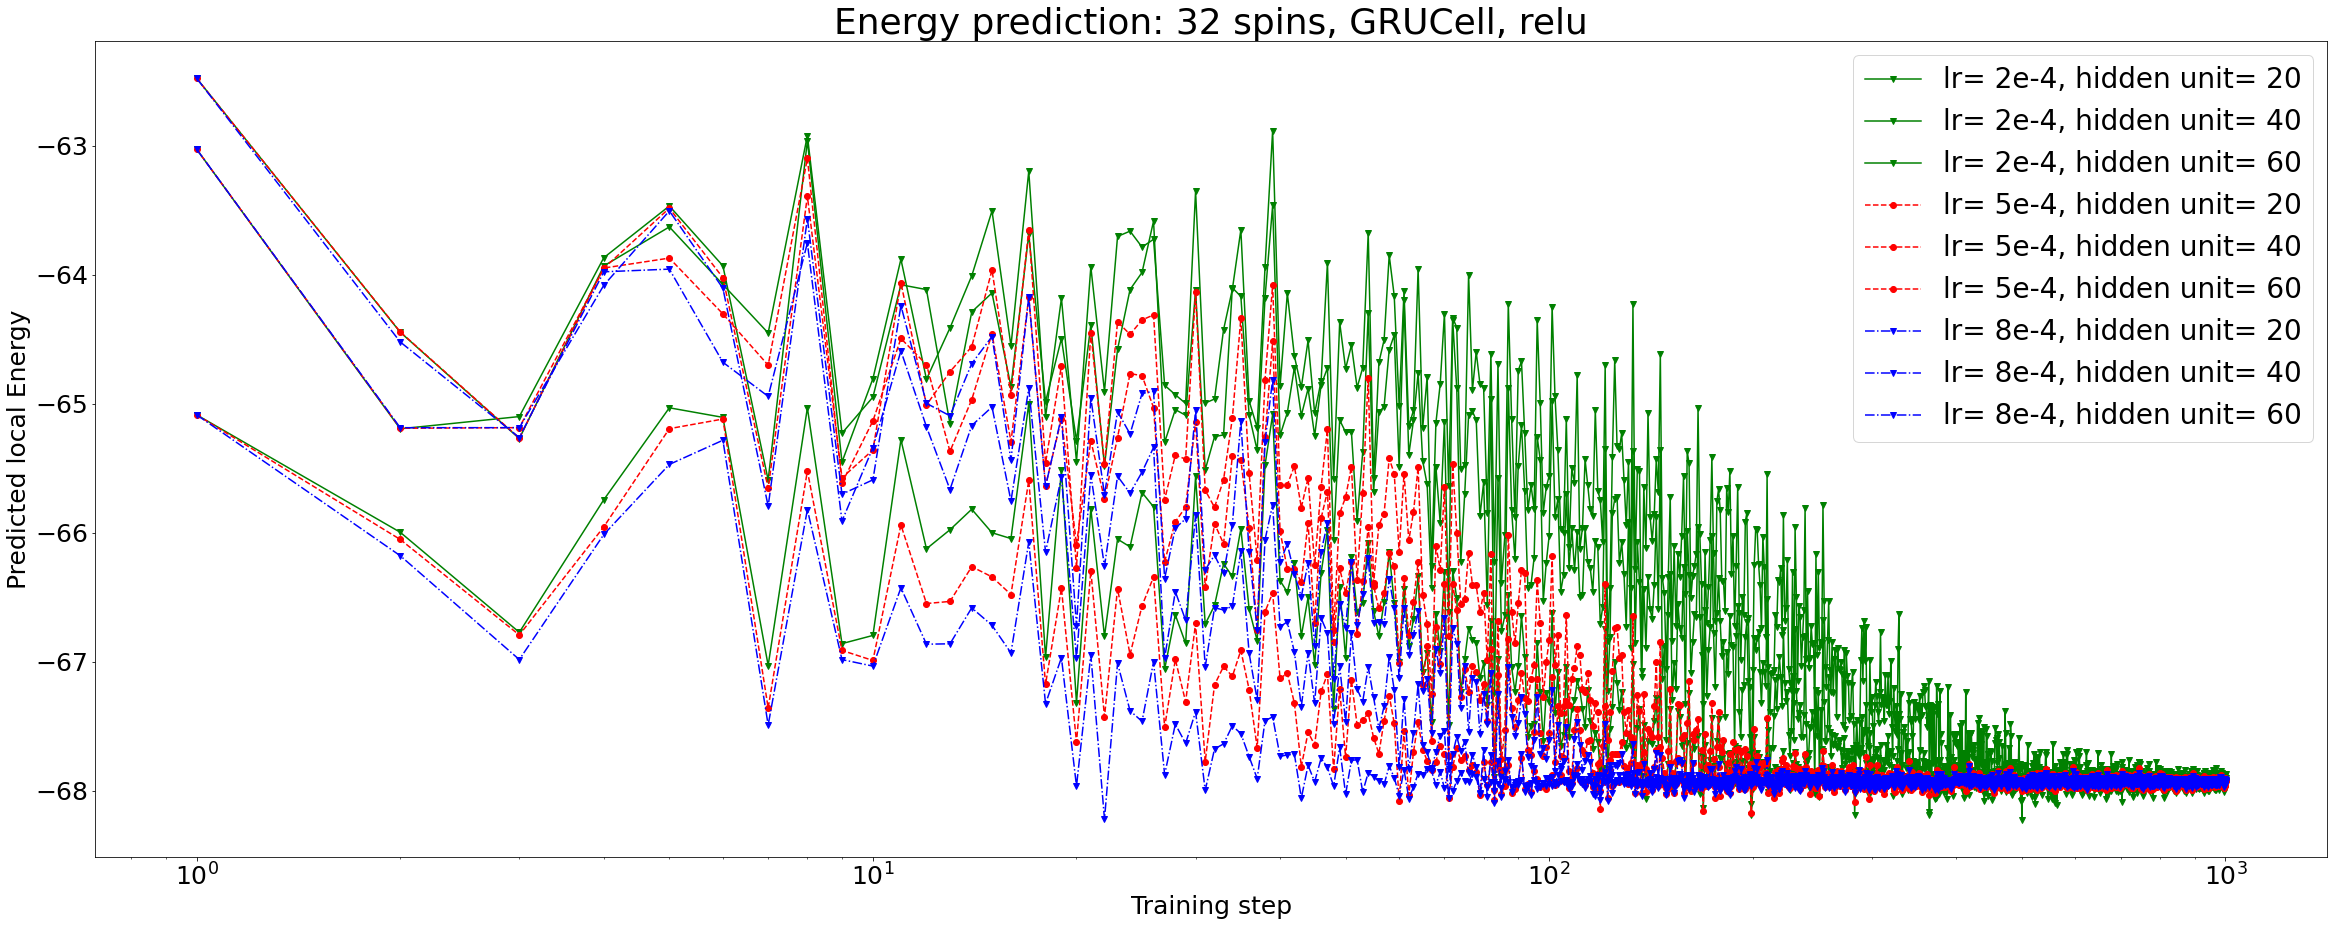

In [30]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 能量震盪收斂圖
rcParams['axes.labelsize']  = 20 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 30
rcParams['legend.fontsize'] = 28
rcParams['xtick.labelsize'] = 25
rcParams['ytick.labelsize'] = 25

      
fig, ax = plt.subplots(figsize=(40, 15))
ax.plot(np.arange(1, len(Energy_32_2_20)+1), Energy_32_2_20, "vg-", label="lr= 2e-4, hidden unit= 20")
ax.plot(np.arange(1, len(Energy_32_2_40)+1), Energy_32_2_40, "vg-", label="lr= 2e-4, hidden unit= 40")
ax.plot(np.arange(1, len(Energy_32_2_60)+1), Energy_32_2_60, "vg-", label="lr= 2e-4, hidden unit= 60")

ax.plot(np.arange(1, len(Energy_32_5_20)+1), Energy_32_5_20, "or--", label="lr= 5e-4, hidden unit= 20")
ax.plot(np.arange(1, len(Energy_32_5_40)+1), Energy_32_5_40, "or--", label="lr= 5e-4, hidden unit= 40")
ax.plot(np.arange(1, len(Energy_32_5_60)+1), Energy_32_5_60, "or--", label="lr= 5e-4, hidden unit= 60")

ax.plot(np.arange(1, len(Energy_32_8_20)+1), Energy_32_8_20, "vb-.", label="lr= 8e-4, hidden unit= 20")
ax.plot(np.arange(1, len(Energy_32_8_40)+1), Energy_32_8_40, "vb-.", label="lr= 8e-4, hidden unit= 40")
ax.plot(np.arange(1, len(Energy_32_8_60)+1), Energy_32_8_60, "vb-.", label="lr= 8e-4, hidden unit= 60")


plt.title("Energy prediction: 32 spins, GRUCell, relu", fontsize = 36)
ax.set_xlabel(r'Training step', fontsize = 25)
ax.set_ylabel('Predicted local Energy', fontsize = 25)
ax.set_xscale('log')
plt.legend()
plt.show()
print("\n")

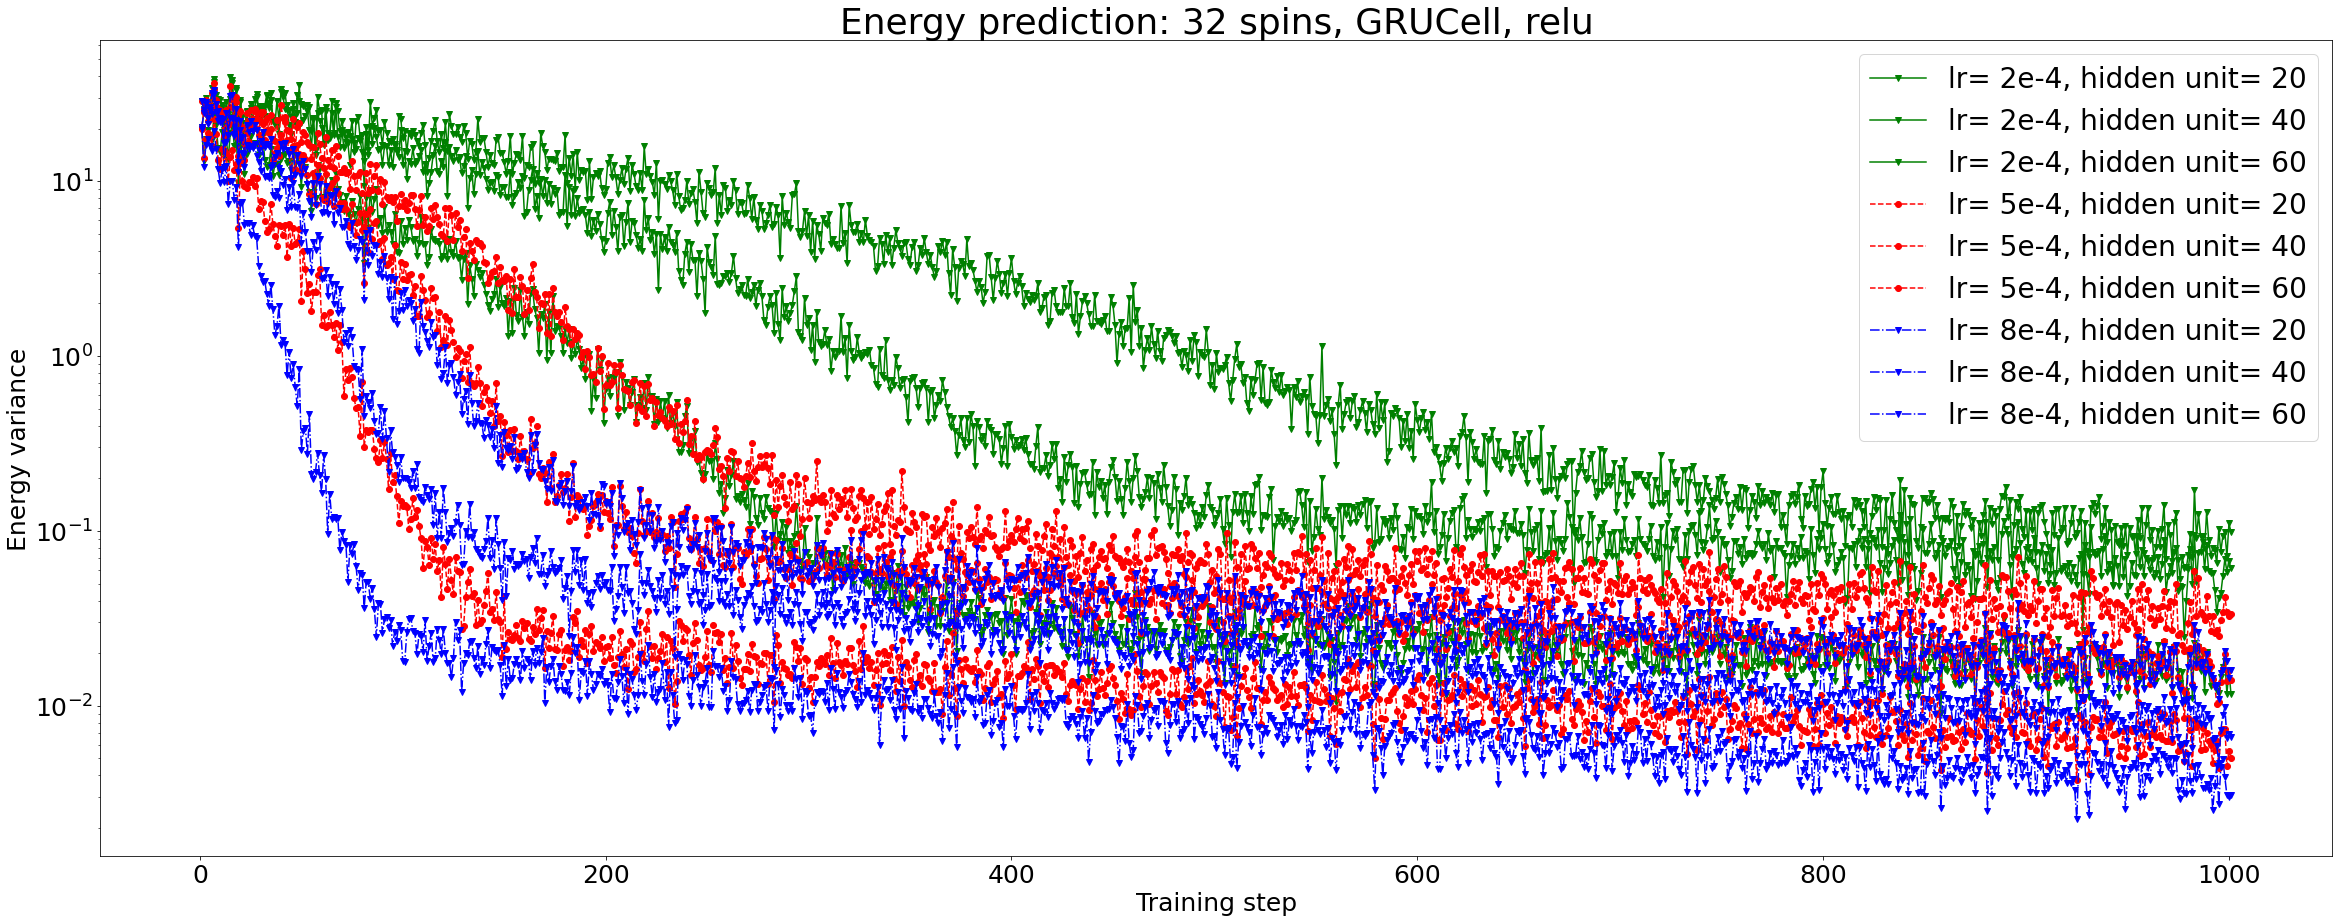

In [31]:
# Variacnce plot
# spin = 32
rcParams['axes.labelsize']  = 40 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 30
rcParams['legend.fontsize'] = 28 # 圖標的大小
rcParams['xtick.labelsize'] = 25
rcParams['ytick.labelsize'] = 25


fig, ax = plt.subplots(figsize=(40,15))

ax.semilogy(np.arange(1, len(Energy_32_2_20)+1), varEnergy_32_2_20, "vg-", label="lr= 2e-4, hidden unit= 20")
ax.semilogy(np.arange(1, len(Energy_32_2_40)+1), varEnergy_32_2_40, "vg-", label="lr= 2e-4, hidden unit= 40")
ax.semilogy(np.arange(1, len(Energy_32_2_60)+1), varEnergy_32_2_60, "vg-", label="lr= 2e-4, hidden unit= 60")

ax.semilogy(np.arange(1, len(Energy_32_5_20)+1), varEnergy_32_5_20, "or--", label="lr= 5e-4, hidden unit= 20")
ax.semilogy(np.arange(1, len(Energy_32_5_40)+1), varEnergy_32_5_40, "or--", label="lr= 5e-4, hidden unit= 40")
ax.semilogy(np.arange(1, len(Energy_32_5_60)+1), varEnergy_32_5_60, "or--", label="lr= 5e-4, hidden unit= 60")

ax.semilogy(np.arange(1, len(Energy_32_8_20)+1), varEnergy_32_8_20, "vb-.", label="lr= 8e-4, hidden unit= 20")
ax.semilogy(np.arange(1, len(Energy_32_8_40)+1), varEnergy_32_8_40, "vb-.", label="lr= 8e-4, hidden unit= 40")
ax.semilogy(np.arange(1, len(Energy_32_8_60)+1), varEnergy_32_8_60, "vb-.", label="lr= 8e-4, hidden unit= 60")


plt.title("Energy prediction: 32 spins, GRUCell, relu", fontsize = 36)
ax.set_xlabel(r'Training step', fontsize = 25)
ax.set_ylabel('Energy variance', fontsize = 25)
plt.legend()
plt.show()
print("\n")



### 實驗1-3-1-2 64 spins

In [33]:
# This cell is: 32 number of spins with different lr and hu
# RNN cell type: GRUCell;
# activation function: sigmoid

import tensorflow as tf
from TrainingRNN_1DTFIM import run_1DTFIM
# name: spin_lr_hu
# 64 spins, lr = 2e-4, hu = 20, 40, 60
Energy_64_2_20, varEnergy_64_2_20 = run_1DTFIM(RNNtype = 1, activationType = 3, numsteps = 1000, systemsize = 64, Bx = +2, num_units = 20, num_layers = 1, numsamples = 50, learningrate = 2e-4, seed = 111)
Energy_64_2_40, varEnergy_64_2_40 = run_1DTFIM(RNNtype = 1, activationType = 3, numsteps = 1000, systemsize = 64, Bx = +2, num_units = 40, num_layers = 1, numsamples = 50, learningrate = 2e-4, seed = 111)
Energy_64_2_60, varEnergy_64_2_60 = run_1DTFIM(RNNtype = 1, activationType = 3, numsteps = 1000, systemsize = 64, Bx = +2, num_units = 60, num_layers = 1, numsamples = 50, learningrate = 2e-4, seed = 111)

# 32 spins, lr = 5e-4, hu = 20, 40, 60
Energy_64_5_20, varEnergy_64_5_20 = run_1DTFIM(RNNtype = 1, activationType = 3, numsteps = 1000, systemsize = 64, Bx = +2, num_units = 20, num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_64_5_40, varEnergy_64_5_40 = run_1DTFIM(RNNtype = 1, activationType = 3, numsteps = 1000, systemsize = 64, Bx = +2, num_units = 40, num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_64_5_60, varEnergy_64_5_60 = run_1DTFIM(RNNtype = 1, activationType = 3, numsteps = 1000, systemsize = 64, Bx = +2, num_units = 60, num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)

# 32 spins, lr = 8e-4, hu = 20, 40, 60
Energy_64_8_20, varEnergy_64_8_20 = run_1DTFIM(RNNtype = 1, activationType = 3, numsteps = 1000, systemsize = 64, Bx = +2, num_units = 20, num_layers = 1, numsamples = 50, learningrate = 8e-4, seed = 111)
Energy_64_8_40, varEnergy_64_8_40 = run_1DTFIM(RNNtype = 1, activationType = 3, numsteps = 1000, systemsize = 64, Bx = +2, num_units = 40, num_layers = 1, numsamples = 50, learningrate = 8e-4, seed = 111)
Energy_64_8_60, varEnergy_64_8_60 = run_1DTFIM(RNNtype = 1, activationType = 3, numsteps = 1000, systemsize = 64, Bx = +2, num_units = 60, num_layers = 1, numsamples = 50, learningrate = 8e-4, seed = 111)



cell type:  <class 'tensorflow.python.keras.layers.recurrent.GRUCell'>
activation Functions <function sigmoid at 0x7f9b18e7e268>
mean(E): -127.3320903466144, var(E): 59.894041666783366, #samples 50, #Step 0 


mean(E): -127.63403093925956, var(E): 60.93138752027576, #samples 50, #Step 10 


mean(E): -129.32623645322522, var(E): 59.45986566242252, #samples 50, #Step 20 


mean(E): -128.37076577856595, var(E): 58.024818694806754, #samples 50, #Step 30 


mean(E): -129.3417735147192, var(E): 64.44242137204334, #samples 50, #Step 40 


mean(E): -127.94654980577455, var(E): 44.82126167865402, #samples 50, #Step 50 


mean(E): -129.787717341222, var(E): 48.369966377674274, #samples 50, #Step 60 


mean(E): -129.523863813948, var(E): 31.541758477064718, #samples 50, #Step 70 


mean(E): -130.79190975587966, var(E): 38.65257100670592, #samples 50, #Step 80 


mean(E): -131.68814791445087, var(E): 41.428550721235034, #samples 50, #Step 90 


mean(E): -132.46805997680553, var(E): 39.864903631373

mean(E): -136.00038260110344, var(E): 0.1931458446383834, #samples 50, #Step 970 


mean(E): -135.90365053518198, var(E): 0.16514050049719192, #samples 50, #Step 980 


mean(E): -135.89415119386464, var(E): 0.11955383492305044, #samples 50, #Step 990 


mean(E): -136.02906133676856, var(E): 0.15722807502231329, #samples 50, #Step 1000 


cell type:  <class 'tensorflow.python.keras.layers.recurrent.GRUCell'>
activation Functions <function sigmoid at 0x7f9b18e7e268>
mean(E): -128.0536299975412, var(E): 56.99145527913301, #samples 50, #Step 0 


mean(E): -128.0951542712513, var(E): 51.45934698385001, #samples 50, #Step 10 


mean(E): -130.5297169447769, var(E): 54.72647215641846, #samples 50, #Step 20 


mean(E): -129.80902577775777, var(E): 59.21478778811031, #samples 50, #Step 30 


mean(E): -129.87765729337787, var(E): 45.94827692497233, #samples 50, #Step 40 


mean(E): -129.83634240850554, var(E): 43.63206904545481, #samples 50, #Step 50 


mean(E): -131.0788295196484, var(E): 39.503

mean(E): -136.0122368494114, var(E): 0.10707816543145691, #samples 50, #Step 930 


mean(E): -135.95440366724543, var(E): 0.07725891267937576, #samples 50, #Step 940 


mean(E): -135.9774994340141, var(E): 0.11442292375424752, #samples 50, #Step 950 


mean(E): -136.00670861993578, var(E): 0.11666768631794243, #samples 50, #Step 960 


mean(E): -136.01407437720403, var(E): 0.12206157243154578, #samples 50, #Step 970 


mean(E): -135.96079824956922, var(E): 0.10547836870721898, #samples 50, #Step 980 


mean(E): -135.96220957388883, var(E): 0.09611894865103557, #samples 50, #Step 990 


mean(E): -136.02701185142772, var(E): 0.09663986164947075, #samples 50, #Step 1000 


cell type:  <class 'tensorflow.python.keras.layers.recurrent.GRUCell'>
activation Functions <function sigmoid at 0x7f9b18e7e268>
mean(E): -130.4468160632258, var(E): 41.6059395770896, #samples 50, #Step 0 


mean(E): -131.92630944854326, var(E): 30.56357154317631, #samples 50, #Step 10 


mean(E): -133.41396525940954, v

mean(E): -135.99189716865237, var(E): 0.033475515647702785, #samples 50, #Step 880 


mean(E): -135.99685910393026, var(E): 0.026529163836346122, #samples 50, #Step 890 


mean(E): -135.96833978157417, var(E): 0.02627347311146736, #samples 50, #Step 900 


mean(E): -136.008241806978, var(E): 0.01540907163663363, #samples 50, #Step 910 


mean(E): -136.02867618582889, var(E): 0.017373248081167646, #samples 50, #Step 920 


mean(E): -136.00820860931788, var(E): 0.02373393845532176, #samples 50, #Step 930 


mean(E): -135.9921241139449, var(E): 0.025205562614828946, #samples 50, #Step 940 


mean(E): -135.97006685932635, var(E): 0.026327053616611838, #samples 50, #Step 950 


mean(E): -136.00100016663313, var(E): 0.029286943814836604, #samples 50, #Step 960 


mean(E): -136.01058995945957, var(E): 0.027403257497813832, #samples 50, #Step 970 


mean(E): -135.99321714831143, var(E): 0.023869850330544465, #samples 50, #Step 980 


mean(E): -135.97619858746884, var(E): 0.023505599970479688, 

mean(E): -135.95883314761585, var(E): 0.062331896372793405, #samples 50, #Step 830 


mean(E): -135.9959931256838, var(E): 0.052328600620226616, #samples 50, #Step 840 


mean(E): -135.9344587290376, var(E): 0.060563691387926076, #samples 50, #Step 850 


mean(E): -135.9732966408517, var(E): 0.0886771292673751, #samples 50, #Step 860 


mean(E): -136.00418520260456, var(E): 0.05443633144119182, #samples 50, #Step 870 


mean(E): -136.01174559431269, var(E): 0.09608553083294435, #samples 50, #Step 880 


mean(E): -136.01347059946346, var(E): 0.074965235313302, #samples 50, #Step 890 


mean(E): -135.91844487575133, var(E): 0.07889114600519102, #samples 50, #Step 900 


mean(E): -136.0228361545006, var(E): 0.030147960964899235, #samples 50, #Step 910 


mean(E): -136.0193656440921, var(E): 0.0388891282609053, #samples 50, #Step 920 


mean(E): -136.03614559339013, var(E): 0.05590614099453008, #samples 50, #Step 930 


mean(E): -135.9715116690996, var(E): 0.058340098667858636, #samples 50

mean(E): -136.01617567650402, var(E): 0.03301775154219817, #samples 50, #Step 780 


mean(E): -136.02949759504054, var(E): 0.028305519446764647, #samples 50, #Step 790 


mean(E): -136.0112525912787, var(E): 0.04292639143709995, #samples 50, #Step 800 


mean(E): -135.99355881543983, var(E): 0.029791604383457532, #samples 50, #Step 810 


mean(E): -135.99575459431958, var(E): 0.03575179705938561, #samples 50, #Step 820 


mean(E): -136.0014158292969, var(E): 0.030114406186864482, #samples 50, #Step 830 


mean(E): -136.01082362126178, var(E): 0.034168095812550606, #samples 50, #Step 840 


mean(E): -135.96086663129208, var(E): 0.03000619161057787, #samples 50, #Step 850 


mean(E): -135.99603961098825, var(E): 0.0429051229884349, #samples 50, #Step 860 


mean(E): -135.99714984159814, var(E): 0.03550451005770211, #samples 50, #Step 870 


mean(E): -136.00182716254048, var(E): 0.03776339542898735, #samples 50, #Step 880 


mean(E): -136.01033482750043, var(E): 0.03867135056902941, #samp

mean(E): -135.99179631895188, var(E): 0.014983603824796085, #samples 50, #Step 720 


mean(E): -136.01316326038284, var(E): 0.01969157637157217, #samples 50, #Step 730 


mean(E): -136.00656344970477, var(E): 0.012200311777260178, #samples 50, #Step 740 


mean(E): -135.99449497652603, var(E): 0.017742590232650696, #samples 50, #Step 750 


mean(E): -135.98270723333738, var(E): 0.015057849095260025, #samples 50, #Step 760 


mean(E): -135.99630182545457, var(E): 0.014602584391508688, #samples 50, #Step 770 


mean(E): -136.00380680441566, var(E): 0.01310895560350033, #samples 50, #Step 780 


mean(E): -136.0113815816422, var(E): 0.012353130971431705, #samples 50, #Step 790 


mean(E): -136.00355046128004, var(E): 0.016264114215755025, #samples 50, #Step 800 


mean(E): -136.01334568370493, var(E): 0.012622463888564488, #samples 50, #Step 810 


mean(E): -135.98299904517532, var(E): 0.011632346194250015, #samples 50, #Step 820 


mean(E): -136.0102562150938, var(E): 0.01162944325990648,

mean(E): -136.041470291745, var(E): 0.04212256936350088, #samples 50, #Step 670 


mean(E): -135.9868651153568, var(E): 0.055320213684340175, #samples 50, #Step 680 


mean(E): -136.03564044478605, var(E): 0.04120110423972073, #samples 50, #Step 690 


mean(E): -135.9605453140471, var(E): 0.037065778590659695, #samples 50, #Step 700 


mean(E): -136.01151552750886, var(E): 0.049195401002582975, #samples 50, #Step 710 


mean(E): -135.9835024770697, var(E): 0.04599950511886288, #samples 50, #Step 720 


mean(E): -136.00336269710445, var(E): 0.039857509277095055, #samples 50, #Step 730 


mean(E): -136.02078810952287, var(E): 0.037989803546930684, #samples 50, #Step 740 


mean(E): -135.9826420831372, var(E): 0.048835239588499314, #samples 50, #Step 750 


mean(E): -135.99575536638105, var(E): 0.041117311017295995, #samples 50, #Step 760 


mean(E): -135.97903596654768, var(E): 0.04155079988678901, #samples 50, #Step 770 


mean(E): -136.00605917760842, var(E): 0.031834341111398864, #sam

mean(E): -136.00985958909138, var(E): 0.02068019567156762, #samples 50, #Step 620 


mean(E): -135.99039041442867, var(E): 0.026164261540533175, #samples 50, #Step 630 


mean(E): -135.97559982056865, var(E): 0.027453675633893452, #samples 50, #Step 640 


mean(E): -135.96237874925836, var(E): 0.040534614762061036, #samples 50, #Step 650 


mean(E): -136.04374216810137, var(E): 0.023512582371841808, #samples 50, #Step 660 


mean(E): -136.0242327022735, var(E): 0.02506618121704085, #samples 50, #Step 670 


mean(E): -135.98265605769103, var(E): 0.030366085887646076, #samples 50, #Step 680 


mean(E): -136.03558998542113, var(E): 0.022563211615677183, #samples 50, #Step 690 


mean(E): -135.98826184208295, var(E): 0.021014993679986452, #samples 50, #Step 700 


mean(E): -136.02411482975748, var(E): 0.02513686028008787, #samples 50, #Step 710 


mean(E): -135.98827778489843, var(E): 0.0224593968778298, #samples 50, #Step 720 


mean(E): -136.01088699384036, var(E): 0.02491192004322443, #

mean(E): -136.01725542894738, var(E): 0.015461671521599335, #samples 50, #Step 560 


mean(E): -136.02240519905754, var(E): 0.011000156671178395, #samples 50, #Step 570 


mean(E): -135.99982257805058, var(E): 0.009877873582191382, #samples 50, #Step 580 


mean(E): -136.01487818303644, var(E): 0.010613927621482572, #samples 50, #Step 590 


mean(E): -135.9799997676538, var(E): 0.015678383572787422, #samples 50, #Step 600 


mean(E): -135.99530992792504, var(E): 0.011375964024002365, #samples 50, #Step 610 


mean(E): -136.00626729388802, var(E): 0.009084668635373333, #samples 50, #Step 620 


mean(E): -136.0002801801923, var(E): 0.011663623490998835, #samples 50, #Step 630 


mean(E): -135.98471416137784, var(E): 0.013303954463883, #samples 50, #Step 640 


mean(E): -135.9849212058465, var(E): 0.01286893971765992, #samples 50, #Step 650 


mean(E): -136.02446850552417, var(E): 0.011180480820406543, #samples 50, #Step 660 


mean(E): -136.02147570747266, var(E): 0.009112895024311028, #

In [38]:
# Print best model for 32 spins     
import numpy as np

min_Energy_64_2_20 = min(Energy_64_2_20)
print('min_Energy_64_2_20', min_Energy_64_2_20)
print('\n')

min_Energy_64_2_40 = min(Energy_64_2_40)
print('min_Energy_64_2_40', min_Energy_64_2_40)
print('\n')

min_Energy_64_2_60 = min(Energy_64_2_60)
print('min_Energy_64_2_60', min_Energy_64_2_60)
print('\n')



min_Energy_64_5_20 = min(Energy_64_5_20)
print('min_Energy_64_5_20', min_Energy_64_5_20)
print('\n')

min_Energy_64_5_40 = min(Energy_64_5_40)
print('min_Energy_64_5_40', min_Energy_64_5_40)
print('\n')

min_Energy_64_5_60 = min(Energy_64_5_60)
print('min_Energy_64_5_60', min_Energy_64_5_60)
print('\n')



min_Energy_64_8_20 = min(Energy_64_8_20)
print('min_Energy_64_8_20', min_Energy_64_8_20)
print('\n')

min_Energy_64_8_40 = min(Energy_64_8_40)
print('min_Energy_64_8_40', min_Energy_64_8_40)
print('\n')

min_Energy_64_8_60 = min(Energy_64_8_60)
print('min_Energy_64_8_60', min_Energy_64_8_60)
print('\n')

min_Energy_64_2_20 -136.24699021412658


min_Energy_64_2_40 -136.31778863002359


min_Energy_64_2_60 -136.34846978931776


min_Energy_64_5_20 -136.34904203758904


min_Energy_64_5_40 -136.32330706935716


min_Energy_64_5_60 -136.18820500863623


min_Energy_64_8_20 -136.24471681631218


min_Energy_64_8_40 -136.2172317006149


min_Energy_64_8_60 -136.08371220390273




In [42]:
import numpy as np
#Computing the ground state energy by taking average over the last 100 iterations
numsamples = 50
print('Use Ground state energy to find the best model:')
print("Energy_64_2_20    = ", np.mean(Energy_64_2_20[-200:]), "+-", np.sqrt(np.max(varEnergy_64_2_20[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_64_2_40    = ", np.mean(Energy_64_2_40[-200:]), "+-", np.sqrt(np.max(varEnergy_64_2_40[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_64_2_60    = ", np.mean(Energy_64_2_60[-200:]), "+-", np.sqrt(np.max(varEnergy_64_2_60[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("\n")

print("Energy_64_2_20    = ", np.mean(Energy_64_5_20[-200:]), "+-", np.sqrt(np.max(varEnergy_64_5_20[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_64_2_40    = ", np.mean(Energy_64_5_40[-200:]), "+-", np.sqrt(np.max(varEnergy_64_5_40[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_64_2_60    = ", np.mean(Energy_64_5_60[-200:]), "+-", np.sqrt(np.max(varEnergy_64_5_60[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("\n")

print("Energy_64_2_20    = ", np.mean(Energy_64_8_20[-200:]), "+-", np.sqrt(np.max(varEnergy_64_8_20[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_64_2_40    = ", np.mean(Energy_64_8_40[-200:]), "+-", np.sqrt(np.max(varEnergy_64_8_40[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_64_2_60    = ", np.mean(Energy_64_8_60[-200:]), "+-", np.sqrt(np.max(varEnergy_64_8_60[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("\n")
print('best model for 64 spins: GRUcell, sigmoid, lr = 2e-5, hidden unit = 60')

Use Ground state energy to find the best model:
Energy_64_2_20    =  -135.9848092623469 +- 0.005471655810861678
Energy_64_2_40    =  -135.9883728171035 +- 0.004636122650867571
Energy_64_2_60    =  -135.99907067061156 +- 0.0021470935577434535


Energy_64_2_20    =  -135.9959659296933 +- 0.0035244764673711157
Energy_64_2_40    =  -135.99818631442346 +- 0.002657647418613298
Energy_64_2_60    =  -136.00044537504226 +- 0.0015669991803658398


Energy_64_2_20    =  -135.99839038168892 +- 0.0026529231616886696
Energy_64_2_40    =  -135.9999948279923 +- 0.0018873238877666373
Energy_64_2_60    =  -136.0007972442446 +- 0.0012961478899251129


best model for 64 spins: GRUcell, sigmoid, lr = 2e-5, hidden unit = 60


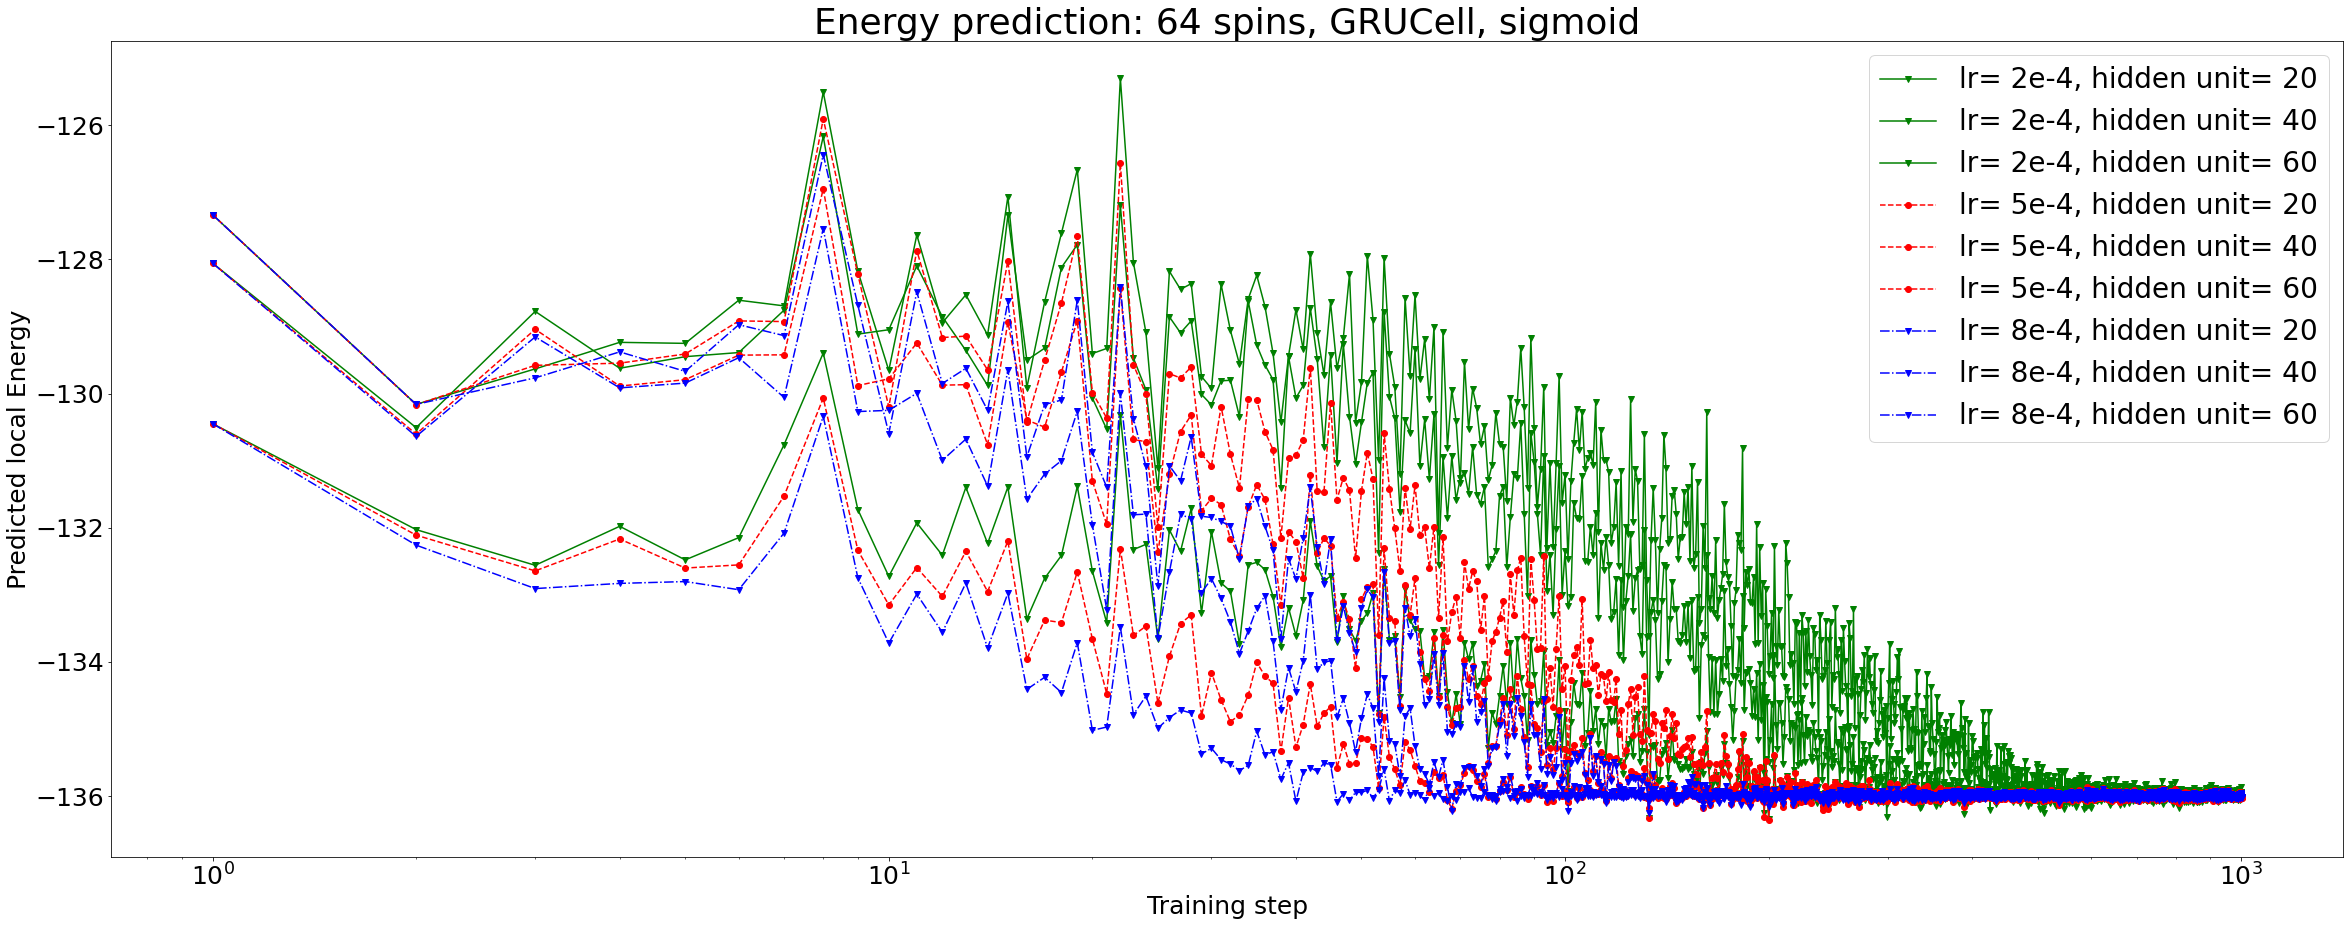

In [40]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 能量震盪收斂圖
rcParams['axes.labelsize']  = 20 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 30
rcParams['legend.fontsize'] = 28
rcParams['xtick.labelsize'] = 25
rcParams['ytick.labelsize'] = 25

      
fig, ax = plt.subplots(figsize=(40, 15))
ax.plot(np.arange(1, len(Energy_64_2_20)+1), Energy_64_2_20, "vg-", label="lr= 2e-4, hidden unit= 20")
ax.plot(np.arange(1, len(Energy_64_2_40)+1), Energy_64_2_40, "vg-", label="lr= 2e-4, hidden unit= 40")
ax.plot(np.arange(1, len(Energy_64_2_60)+1), Energy_64_2_60, "vg-", label="lr= 2e-4, hidden unit= 60")

ax.plot(np.arange(1, len(Energy_64_5_20)+1), Energy_64_5_20, "or--", label="lr= 5e-4, hidden unit= 20")
ax.plot(np.arange(1, len(Energy_64_5_40)+1), Energy_64_5_40, "or--", label="lr= 5e-4, hidden unit= 40")
ax.plot(np.arange(1, len(Energy_64_5_60)+1), Energy_64_5_60, "or--", label="lr= 5e-4, hidden unit= 60")

ax.plot(np.arange(1, len(Energy_64_8_20)+1), Energy_64_8_20, "vb-.", label="lr= 8e-4, hidden unit= 20")
ax.plot(np.arange(1, len(Energy_64_8_40)+1), Energy_64_8_40, "vb-.", label="lr= 8e-4, hidden unit= 40")
ax.plot(np.arange(1, len(Energy_64_8_60)+1), Energy_64_8_60, "vb-.", label="lr= 8e-4, hidden unit= 60")


plt.title("Energy prediction: 64 spins, GRUCell, sigmoid", fontsize = 36)
ax.set_xlabel(r'Training step', fontsize = 25)
ax.set_ylabel('Predicted local Energy', fontsize = 25)
ax.set_xscale('log')
plt.legend()
plt.show()
print("\n")

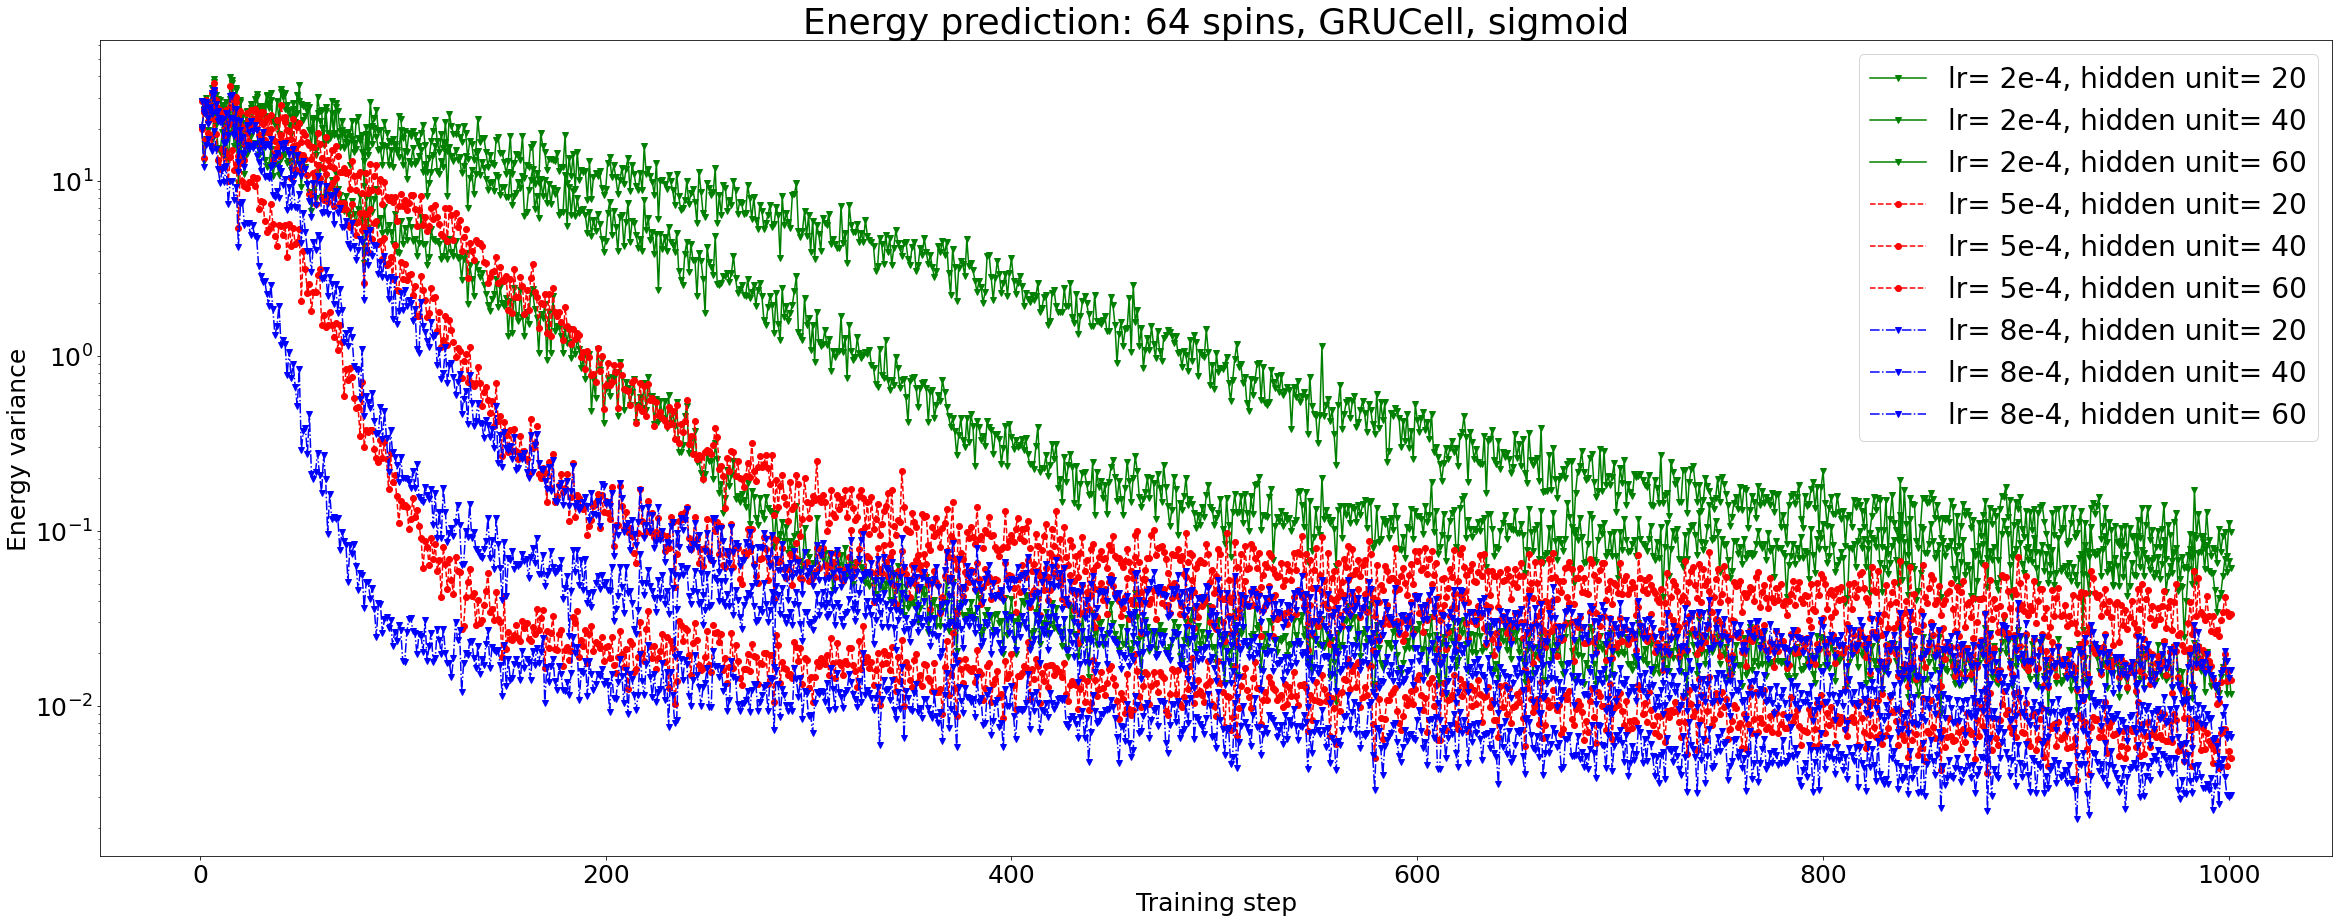

In [41]:
# Variacnce plot
# spin = 64
rcParams['axes.labelsize']  = 40 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 30
rcParams['legend.fontsize'] = 28 # 圖標的大小
rcParams['xtick.labelsize'] = 25
rcParams['ytick.labelsize'] = 25


fig, ax = plt.subplots(figsize=(40,15))

ax.semilogy(np.arange(1, len(Energy_32_2_20)+1), varEnergy_32_2_20, "vg-", label="lr= 2e-4, hidden unit= 20")
ax.semilogy(np.arange(1, len(Energy_32_2_40)+1), varEnergy_32_2_40, "vg-", label="lr= 2e-4, hidden unit= 40")
ax.semilogy(np.arange(1, len(Energy_32_2_60)+1), varEnergy_32_2_60, "vg-", label="lr= 2e-4, hidden unit= 60")

ax.semilogy(np.arange(1, len(Energy_32_5_20)+1), varEnergy_32_5_20, "or--", label="lr= 5e-4, hidden unit= 20")
ax.semilogy(np.arange(1, len(Energy_32_5_40)+1), varEnergy_32_5_40, "or--", label="lr= 5e-4, hidden unit= 40")
ax.semilogy(np.arange(1, len(Energy_32_5_60)+1), varEnergy_32_5_60, "or--", label="lr= 5e-4, hidden unit= 60")

ax.semilogy(np.arange(1, len(Energy_32_8_20)+1), varEnergy_32_8_20, "vb-.", label="lr= 8e-4, hidden unit= 20")
ax.semilogy(np.arange(1, len(Energy_32_8_40)+1), varEnergy_32_8_40, "vb-.", label="lr= 8e-4, hidden unit= 40")
ax.semilogy(np.arange(1, len(Energy_32_8_60)+1), varEnergy_32_8_60, "vb-.", label="lr= 8e-4, hidden unit= 60")


plt.title("Energy prediction: 64 spins, GRUCell, sigmoid", fontsize = 36)
ax.set_xlabel(r'Training step', fontsize = 25)
ax.set_ylabel('Energy variance', fontsize = 25)
plt.legend()
plt.show()
print("\n")



### 實驗1-3-1-3 128 spins

In [43]:
# This cell is: 128 number of spins with different lr and hu
# RNN cell type: GRUCell;
# activation function: sigmoid

import tensorflow as tf
from TrainingRNN_1DTFIM import run_1DTFIM
# name: spin_lr_hu
# 128 spins, lr = 2e-4, hu = 20, 40, 60
Energy_128_2_20, varEnergy_128_2_20 = run_1DTFIM(RNNtype = 1, activationType = 3, numsteps = 1000, systemsize = 128, Bx = +2, num_units = 20, num_layers = 1, numsamples = 50, learningrate = 2e-4, seed = 111)
Energy_128_2_40, varEnergy_128_2_40 = run_1DTFIM(RNNtype = 1, activationType = 3, numsteps = 1000, systemsize = 128, Bx = +2, num_units = 40, num_layers = 1, numsamples = 50, learningrate = 2e-4, seed = 111)
Energy_128_2_60, varEnergy_128_2_60 = run_1DTFIM(RNNtype = 1, activationType = 3, numsteps = 1000, systemsize = 128, Bx = +2, num_units = 60, num_layers = 1, numsamples = 50, learningrate = 2e-4, seed = 111)

# 128 spins, lr = 5e-4, hu = 20, 40, 60
Energy_128_5_20, varEnergy_128_5_20 = run_1DTFIM(RNNtype = 1, activationType = 3, numsteps = 1000, systemsize = 128, Bx = +2, num_units = 20, num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_128_5_40, varEnergy_128_5_40 = run_1DTFIM(RNNtype = 1, activationType = 3, numsteps = 1000, systemsize = 128, Bx = +2, num_units = 40, num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_128_5_60, varEnergy_128_5_60 = run_1DTFIM(RNNtype = 1, activationType = 3, numsteps = 1000, systemsize = 128, Bx = +2, num_units = 60, num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)

# 128 spins, lr = 8e-4, hu = 20, 40, 60
Energy_128_8_20, varEnergy_128_8_20 = run_1DTFIM(RNNtype = 1, activationType = 3, numsteps = 1000, systemsize = 128, Bx = +2, num_units = 20, num_layers = 1, numsamples = 50, learningrate = 8e-4, seed = 111)
Energy_128_8_40, varEnergy_128_8_40 = run_1DTFIM(RNNtype = 1, activationType = 3, numsteps = 1000, systemsize = 128, Bx = +2, num_units = 40, num_layers = 1, numsamples = 50, learningrate = 8e-4, seed = 111)
Energy_128_8_60, varEnergy_128_8_60 = run_1DTFIM(RNNtype = 1, activationType = 3, numsteps = 1000, systemsize = 128, Bx = +2, num_units = 60, num_layers = 1, numsamples = 50, learningrate = 8e-4, seed = 111)



cell type:  <class 'tensorflow.python.keras.layers.recurrent.GRUCell'>
activation Functions <function sigmoid at 0x7f9b18e7e268>
mean(E): -259.5009433359003, var(E): 101.85261118920732, #samples 50, #Step 0 


mean(E): -255.83211004991145, var(E): 119.07867635346892, #samples 50, #Step 10 


mean(E): -258.2294376904519, var(E): 119.53001138507993, #samples 50, #Step 20 


mean(E): -256.6649149380499, var(E): 106.97310939623544, #samples 50, #Step 30 


mean(E): -257.4306502431124, var(E): 93.41449448144755, #samples 50, #Step 40 


mean(E): -261.6878918679067, var(E): 138.00227163410048, #samples 50, #Step 50 


mean(E): -260.35983663516544, var(E): 59.975867991022476, #samples 50, #Step 60 


mean(E): -260.8823832468338, var(E): 79.9251852017319, #samples 50, #Step 70 


mean(E): -262.9027427423547, var(E): 112.85109639513931, #samples 50, #Step 80 


mean(E): -261.6857577744475, var(E): 94.17152430819873, #samples 50, #Step 90 


mean(E): -265.6172605115573, var(E): 60.0800204482322,

mean(E): -272.15038783337917, var(E): 0.24546362030677538, #samples 50, #Step 980 


mean(E): -272.0360597356172, var(E): 0.17480643406762514, #samples 50, #Step 990 


mean(E): -272.12924612491804, var(E): 0.10704532938972963, #samples 50, #Step 1000 


cell type:  <class 'tensorflow.python.keras.layers.recurrent.GRUCell'>
activation Functions <function sigmoid at 0x7f9b18e7e268>
mean(E): -259.89665187294594, var(E): 118.747736228613, #samples 50, #Step 0 


mean(E): -257.3804903963584, var(E): 129.08806788181062, #samples 50, #Step 10 


mean(E): -259.56938234857427, var(E): 87.27533086009387, #samples 50, #Step 20 


mean(E): -257.58509920914975, var(E): 80.41858578169742, #samples 50, #Step 30 


mean(E): -258.76038301074, var(E): 72.4427328474071, #samples 50, #Step 40 


mean(E): -262.33326232673136, var(E): 122.25425613498986, #samples 50, #Step 50 


mean(E): -261.5950142957487, var(E): 66.39241179009395, #samples 50, #Step 60 


mean(E): -262.9592373114736, var(E): 59.00743110

mean(E): -272.0941672198756, var(E): 0.12401824959586279, #samples 50, #Step 940 


mean(E): -272.16268335201914, var(E): 0.16503798064408792, #samples 50, #Step 950 


mean(E): -272.0854548352893, var(E): 0.17525092200309678, #samples 50, #Step 960 


mean(E): -272.1179940443862, var(E): 0.11121312447829804, #samples 50, #Step 970 


mean(E): -272.1127673186467, var(E): 0.1332773868958426, #samples 50, #Step 980 


mean(E): -272.07528947574946, var(E): 0.13904038041518876, #samples 50, #Step 990 


mean(E): -272.1705349755963, var(E): 0.10186563663103737, #samples 50, #Step 1000 


cell type:  <class 'tensorflow.python.keras.layers.recurrent.GRUCell'>
activation Functions <function sigmoid at 0x7f9b18e7e268>
mean(E): -265.26432690389146, var(E): 80.42994828883816, #samples 50, #Step 0 


mean(E): -263.1258128217572, var(E): 75.9796697482283, #samples 50, #Step 10 


mean(E): -265.5445112466807, var(E): 52.539446611148826, #samples 50, #Step 20 


mean(E): -264.0520628158233, var(E): 6

mean(E): -272.16613087566225, var(E): 0.022963162382046445, #samples 50, #Step 900 


mean(E): -272.14160806347695, var(E): 0.03593101081724104, #samples 50, #Step 910 


mean(E): -272.16168851477505, var(E): 0.03696745099216992, #samples 50, #Step 920 


mean(E): -272.18625524949084, var(E): 0.026405587669654396, #samples 50, #Step 930 


mean(E): -272.13538188227056, var(E): 0.04077717769173263, #samples 50, #Step 940 


mean(E): -272.1572280407225, var(E): 0.03276275652211144, #samples 50, #Step 950 


mean(E): -272.1380141529933, var(E): 0.04203073823449669, #samples 50, #Step 960 


mean(E): -272.16116689922455, var(E): 0.026662070022038166, #samples 50, #Step 970 


mean(E): -272.13588094082775, var(E): 0.040985970783111794, #samples 50, #Step 980 


mean(E): -272.08666616217766, var(E): 0.0352518187174016, #samples 50, #Step 990 


mean(E): -272.14617709690623, var(E): 0.02512438056171236, #samples 50, #Step 1000 


cell type:  <class 'tensorflow.python.keras.layers.recurrent.GR

mean(E): -272.1127851325071, var(E): 0.08389360095527701, #samples 50, #Step 860 


mean(E): -272.12321542377674, var(E): 0.06551147975720174, #samples 50, #Step 870 


mean(E): -272.16255575749284, var(E): 0.11073424387507316, #samples 50, #Step 880 


mean(E): -272.10176583589106, var(E): 0.0884641087798483, #samples 50, #Step 890 


mean(E): -272.1536475786896, var(E): 0.09810434485724519, #samples 50, #Step 900 


mean(E): -272.12746716804037, var(E): 0.11851430843019588, #samples 50, #Step 910 


mean(E): -272.1835584567966, var(E): 0.08557120015162599, #samples 50, #Step 920 


mean(E): -272.2150844244048, var(E): 0.07496742635078348, #samples 50, #Step 930 


mean(E): -272.06226740756995, var(E): 0.0931905398057297, #samples 50, #Step 940 


mean(E): -272.14374893621493, var(E): 0.12300113505114993, #samples 50, #Step 950 


mean(E): -272.1254632906349, var(E): 0.10191726316398432, #samples 50, #Step 960 


mean(E): -272.10864575047583, var(E): 0.07626160597054162, #samples 50, 

mean(E): -272.1235218048012, var(E): 0.05887995857108203, #samples 50, #Step 820 


mean(E): -272.16797429476753, var(E): 0.050521090416869106, #samples 50, #Step 830 


mean(E): -272.07587840078145, var(E): 0.089575943373142, #samples 50, #Step 840 


mean(E): -272.1439667388345, var(E): 0.060813691575234745, #samples 50, #Step 850 


mean(E): -272.1116857725714, var(E): 0.05569333481746853, #samples 50, #Step 860 


mean(E): -272.1390205701528, var(E): 0.04494372026615622, #samples 50, #Step 870 


mean(E): -272.1632803142942, var(E): 0.06506277525417287, #samples 50, #Step 880 


mean(E): -272.1007308499518, var(E): 0.0585675319244123, #samples 50, #Step 890 


mean(E): -272.1576952062432, var(E): 0.03421410225722939, #samples 50, #Step 900 


mean(E): -272.1366921357098, var(E): 0.07177495289128955, #samples 50, #Step 910 


mean(E): -272.1530817792698, var(E): 0.051937525173843084, #samples 50, #Step 920 


mean(E): -272.20273475256175, var(E): 0.04811188257199779, #samples 50, #S

mean(E): -272.1458773819796, var(E): 0.019058974859631424, #samples 50, #Step 770 


mean(E): -272.16903452107886, var(E): 0.016614181328569313, #samples 50, #Step 780 


mean(E): -272.1075190878568, var(E): 0.02521700400442744, #samples 50, #Step 790 


mean(E): -272.11523241636894, var(E): 0.02317938253183357, #samples 50, #Step 800 


mean(E): -272.1106068601624, var(E): 0.020786189701209996, #samples 50, #Step 810 


mean(E): -272.12716696119793, var(E): 0.019846577191920227, #samples 50, #Step 820 


mean(E): -272.15784666193224, var(E): 0.016151856300492543, #samples 50, #Step 830 


mean(E): -272.10600378028977, var(E): 0.025695152307166746, #samples 50, #Step 840 


mean(E): -272.14146384199745, var(E): 0.017767968127673756, #samples 50, #Step 850 


mean(E): -272.11985794383656, var(E): 0.018628913587936665, #samples 50, #Step 860 


mean(E): -272.15171017787793, var(E): 0.014660557863350385, #samples 50, #Step 870 


mean(E): -272.14137110348054, var(E): 0.021483851062014923,

mean(E): -272.0907593872217, var(E): 0.07291655316882434, #samples 50, #Step 720 


mean(E): -272.17195471660676, var(E): 0.05161359925178521, #samples 50, #Step 730 


mean(E): -272.1854152830662, var(E): 0.0768403037187585, #samples 50, #Step 740 


mean(E): -272.15851708889534, var(E): 0.06986347049793057, #samples 50, #Step 750 


mean(E): -272.11946317857206, var(E): 0.095751309461177, #samples 50, #Step 760 


mean(E): -272.1158361297532, var(E): 0.07872480221474337, #samples 50, #Step 770 


mean(E): -272.13959128627346, var(E): 0.058616759687754316, #samples 50, #Step 780 


mean(E): -272.06923101568935, var(E): 0.08437149780939501, #samples 50, #Step 790 


mean(E): -272.0939187997819, var(E): 0.05921649534453353, #samples 50, #Step 800 


mean(E): -272.1063379869332, var(E): 0.06219785940441369, #samples 50, #Step 810 


mean(E): -272.123810820466, var(E): 0.062219011824010836, #samples 50, #Step 820 


mean(E): -272.17635456150913, var(E): 0.05219389757469388, #samples 50, #

mean(E): -272.1593485666117, var(E): 0.04080242864749709, #samples 50, #Step 670 


mean(E): -272.1571487291471, var(E): 0.03632188300968883, #samples 50, #Step 680 


mean(E): -272.1698062634535, var(E): 0.027559623378433463, #samples 50, #Step 690 


mean(E): -272.08844116854766, var(E): 0.05048742984621987, #samples 50, #Step 700 


mean(E): -272.11892273074886, var(E): 0.036915127850101766, #samples 50, #Step 710 


mean(E): -272.1068962649476, var(E): 0.035182377600773786, #samples 50, #Step 720 


mean(E): -272.1576772352066, var(E): 0.02843743988922674, #samples 50, #Step 730 


mean(E): -272.16919584679744, var(E): 0.040453702486763915, #samples 50, #Step 740 


mean(E): -272.15437469173116, var(E): 0.033309047992784994, #samples 50, #Step 750 


mean(E): -272.12034955042515, var(E): 0.05278514624195859, #samples 50, #Step 760 


mean(E): -272.1520643950022, var(E): 0.036449785496849775, #samples 50, #Step 770 


mean(E): -272.1414923650841, var(E): 0.040579376350813684, #sampl

mean(E): -272.1198547364472, var(E): 0.022889480121188993, #samples 50, #Step 620 


mean(E): -272.09947785494114, var(E): 0.026611305818382388, #samples 50, #Step 630 


mean(E): -272.146849223871, var(E): 0.017484969513503902, #samples 50, #Step 640 


mean(E): -272.12535473705805, var(E): 0.019031837203585592, #samples 50, #Step 650 


mean(E): -272.1294176698458, var(E): 0.022575627816431, #samples 50, #Step 660 


mean(E): -272.15478178687664, var(E): 0.011831669322657152, #samples 50, #Step 670 


mean(E): -272.1560326651698, var(E): 0.01960548135376304, #samples 50, #Step 680 


mean(E): -272.1583328166225, var(E): 0.011681009189441394, #samples 50, #Step 690 


mean(E): -272.1157507305339, var(E): 0.021045608402078288, #samples 50, #Step 700 


mean(E): -272.113849355321, var(E): 0.014917585425703005, #samples 50, #Step 710 


mean(E): -272.11315735626437, var(E): 0.013325910880897232, #samples 50, #Step 720 


mean(E): -272.15527122936584, var(E): 0.007580152243381401, #sample

In [44]:
# Print best model for 32 spins     
import numpy as np

min_Energy_128_2_20 = min(Energy_128_2_20)
print('min_Energy_128_2_20', min_Energy_128_2_20)
print('\n')

min_Energy_128_2_40 = min(Energy_128_2_40)
print('min_Energy_128_2_40', min_Energy_128_2_40)
print('\n')

min_Energy_128_2_60 = min(Energy_128_2_60)
print('min_Energy_128_2_60', min_Energy_128_2_60)
print('\n')



min_Energy_128_5_20 = min(Energy_128_5_20)
print('min_Energy_128_5_20', min_Energy_128_5_20)
print('\n')

min_Energy_128_5_40 = min(Energy_128_5_40)
print('min_Energy_128_5_40', min_Energy_128_5_40)
print('\n')

min_Energy_128_5_60 = min(Energy_128_5_60)
print('min_Energy_128_5_60', min_Energy_128_5_60)
print('\n')



min_Energy_128_8_20 = min(Energy_128_8_20)
print('min_Energy_128_8_20', min_Energy_128_8_20)
print('\n')

min_Energy_128_8_40 = min(Energy_128_8_40)
print('min_Energy_128_8_40', min_Energy_128_8_40)
print('\n')

min_Energy_128_8_60 = min(Energy_128_8_60)
print('min_Energy_128_8_60', min_Energy_128_8_60)
print('\n')
print('best model for 128 spins: min_Energy_128__')

min_Energy_128_2_20 -272.4482720357851


min_Energy_128_2_40 -272.73960361073097


min_Energy_128_2_60 -272.43545983090564


min_Energy_128_5_20 -272.3657150048637


min_Energy_128_5_40 -272.31484283128304


min_Energy_128_5_60 -272.3674709598906


min_Energy_128_8_20 -272.3193590652359


min_Energy_128_8_40 -272.32818604970674


min_Energy_128_8_60 -272.31063203945655


best model for 128 spins: min_Energy_128__


In [45]:
import numpy as np
#Computing the ground state energy by taking average over the last 100 iterations
numsamples = 50
print('Use Ground state energy to find the best model:')
print("Energy_128_2_20    = ", np.mean(Energy_128_2_20[-200:]), "+-", np.sqrt(np.max(varEnergy_128_2_20[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_128_2_40    = ", np.mean(Energy_128_2_40[-200:]), "+-", np.sqrt(np.max(varEnergy_128_2_40[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_128_2_60    = ", np.mean(Energy_128_2_60[-200:]), "+-", np.sqrt(np.max(varEnergy_128_2_60[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("\n")

print("Energy_128_2_20    = ", np.mean(Energy_128_5_20[-200:]), "+-", np.sqrt(np.max(varEnergy_128_5_20[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_128_2_40    = ", np.mean(Energy_128_5_40[-200:]), "+-", np.sqrt(np.max(varEnergy_128_5_40[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_128_2_60    = ", np.mean(Energy_128_5_60[-200:]), "+-", np.sqrt(np.max(varEnergy_128_5_60[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("\n")

print("Energy_128_2_20    = ", np.mean(Energy_128_8_20[-200:]), "+-", np.sqrt(np.max(varEnergy_128_8_20[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_128_2_40    = ", np.mean(Energy_128_8_40[-200:]), "+-", np.sqrt(np.max(varEnergy_128_8_40[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_128_2_60    = ", np.mean(Energy_128_8_60[-200:]), "+-", np.sqrt(np.max(varEnergy_128_8_60[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("\n")
print('best model for 64 spins: GRUcell, sigmoid, lr = 2e-5, hidden unit = 60')

Use Ground state energy to find the best model:
Energy_128_2_20    =  -272.1142762078375 +- 0.0071426778942724495
Energy_128_2_40    =  -272.1196812686804 +- 0.005406190289558311
Energy_128_2_60    =  -272.1343259242611 +- 0.0024135652428813755


Energy_128_2_20    =  -272.1307433574122 +- 0.004067539691966541
Energy_128_2_40    =  -272.1314832443458 +- 0.0030886328631975833
Energy_128_2_60    =  -272.13588588188264 +- 0.0018802848654147152


Energy_128_2_20    =  -272.1332641203568 +- 0.0031753908867631765
Energy_128_2_40    =  -272.13387359330454 +- 0.002330808451587607
Energy_128_2_60    =  -272.1361417865557 +- 0.0016992105366476393


best model for 64 spins: GRUcell, sigmoid, lr = 2e-5, hidden unit = 60


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 能量震盪收斂圖
rcParams['axes.labelsize']  = 20 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 30
rcParams['legend.fontsize'] = 28
rcParams['xtick.labelsize'] = 25
rcParams['ytick.labelsize'] = 25

      
fig, ax = plt.subplots(figsize=(40, 15))
ax.plot(np.arange(1, len(Energy_128_2_20)+1), Energy_128_2_20, "vg-", label="lr= 2e-4, hidden unit= 20")
ax.plot(np.arange(1, len(Energy_128_2_40)+1), Energy_128_2_40, "vg-", label="lr= 2e-4, hidden unit= 40")
ax.plot(np.arange(1, len(Energy_128_2_60)+1), Energy_128_2_60, "vg-", label="lr= 2e-4, hidden unit= 60")

ax.plot(np.arange(1, len(Energy_128_5_20)+1), Energy_128_5_20, "or--", label="lr= 5e-4, hidden unit= 20")
ax.plot(np.arange(1, len(Energy_128_5_40)+1), Energy_128_5_40, "or--", label="lr= 5e-4, hidden unit= 40")
ax.plot(np.arange(1, len(Energy_128_5_60)+1), Energy_128_5_60, "or--", label="lr= 5e-4, hidden unit= 60")

ax.plot(np.arange(1, len(Energy_128_8_20)+1), Energy_128_8_20, "vb-.", label="lr= 8e-4, hidden unit= 20")
ax.plot(np.arange(1, len(Energy_128_8_40)+1), Energy_128_8_40, "vb-.", label="lr= 8e-4, hidden unit= 40")
ax.plot(np.arange(1, len(Energy_128_8_60)+1), Energy_128_8_60, "vb-.", label="lr= 8e-4, hidden unit= 60")


plt.title("Energy prediction: 128 spins, GRUCell, sigmoid", fontsize = 36)
ax.set_xlabel(r'Training step', fontsize = 25)
ax.set_ylabel('Predicted local Energy', fontsize = 25)
ax.set_xscale('log')
plt.legend()
plt.show()
print("\n")

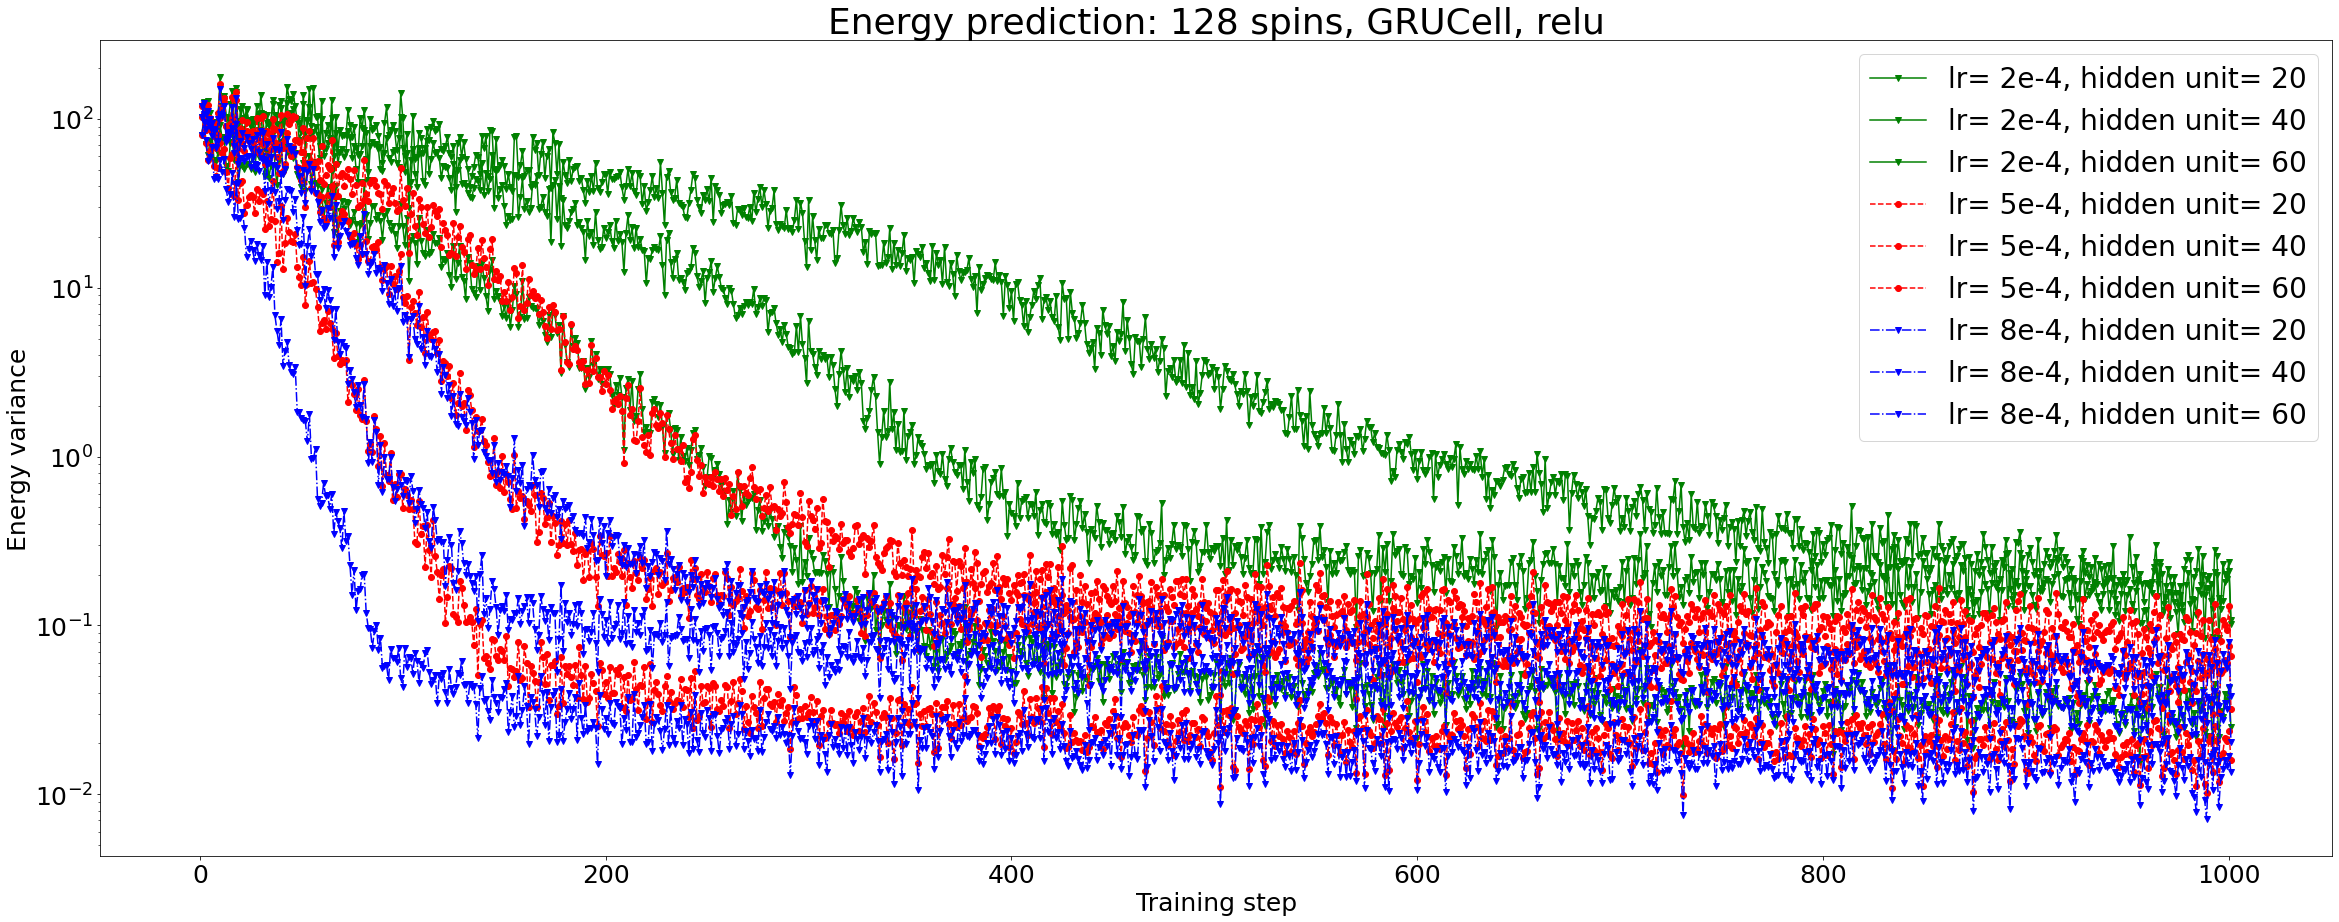

In [47]:
# Variacnce plot
# spin = 128
rcParams['axes.labelsize']  = 40 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 30
rcParams['legend.fontsize'] = 28 # 圖標的大小
rcParams['xtick.labelsize'] = 25
rcParams['ytick.labelsize'] = 25


fig, ax = plt.subplots(figsize=(40,15))

ax.semilogy(np.arange(1, len(Energy_128_2_20)+1), varEnergy_128_2_20, "vg-", label="lr= 2e-4, hidden unit= 20")
ax.semilogy(np.arange(1, len(Energy_128_2_40)+1), varEnergy_128_2_40, "vg-", label="lr= 2e-4, hidden unit= 40")
ax.semilogy(np.arange(1, len(Energy_128_2_60)+1), varEnergy_128_2_60, "vg-", label="lr= 2e-4, hidden unit= 60")

ax.semilogy(np.arange(1, len(Energy_128_5_20)+1), varEnergy_128_5_20, "or--", label="lr= 5e-4, hidden unit= 20")
ax.semilogy(np.arange(1, len(Energy_128_5_40)+1), varEnergy_128_5_40, "or--", label="lr= 5e-4, hidden unit= 40")
ax.semilogy(np.arange(1, len(Energy_128_5_60)+1), varEnergy_128_5_60, "or--", label="lr= 5e-4, hidden unit= 60")

ax.semilogy(np.arange(1, len(Energy_128_8_20)+1), varEnergy_128_8_20, "vb-.", label="lr= 8e-4, hidden unit= 20")
ax.semilogy(np.arange(1, len(Energy_128_8_40)+1), varEnergy_128_8_40, "vb-.", label="lr= 8e-4, hidden unit= 40")
ax.semilogy(np.arange(1, len(Energy_128_8_60)+1), varEnergy_128_8_60, "vb-.", label="lr= 8e-4, hidden unit= 60")


plt.title("Energy prediction: 128 spins, GRUCell, sigmoid", fontsize = 36)
ax.set_xlabel(r'Training step', fontsize = 25)
ax.set_ylabel('Energy variance', fontsize = 25)
plt.legend()
plt.show()
print("\n")

### 實驗1-3-1-4 256 spins

In [51]:
# This cell is: 256 number of spins with different lr and hu
# RNN cell type: GRUCell;
# activation function: sigmoid

import tensorflow as tf
from TrainingRNN_1DTFIM import run_1DTFIM
# name: spin_lr_hu
# 256 spins, lr = 2e-4, hu = 20, 40, 60
Energy_256_2_20, varEnergy_256_2_20 = run_1DTFIM(RNNtype = 1, activationType = 1, numsteps = 1000, systemsize = 256, Bx = +2, num_units = 20, num_layers = 1, numsamples = 50, learningrate = 2e-4, seed = 111)
Energy_256_2_40, varEnergy_256_2_40 = run_1DTFIM(RNNtype = 1, activationType = 1, numsteps = 1000, systemsize = 256, Bx = +2, num_units = 40, num_layers = 1, numsamples = 50, learningrate = 2e-4, seed = 111)
Energy_256_2_60, varEnergy_256_2_60 = run_1DTFIM(RNNtype = 1, activationType = 1, numsteps = 1000, systemsize = 256, Bx = +2, num_units = 60, num_layers = 1, numsamples = 50, learningrate = 2e-4, seed = 111)

# 256 spins, lr = 5e-4, hu = 20, 40, 60
Energy_256_5_20, varEnergy_256_5_20 = run_1DTFIM(RNNtype = 1, activationType = 1, numsteps = 1000, systemsize = 256, Bx = +2, num_units = 20, num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_256_5_40, varEnergy_256_5_40 = run_1DTFIM(RNNtype = 1, activationType = 1, numsteps = 1000, systemsize = 256, Bx = +2, num_units = 40, num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
Energy_256_5_60, varEnergy_256_5_60 = run_1DTFIM(RNNtype = 1, activationType = 1, numsteps = 1000, systemsize = 256, Bx = +2, num_units = 60, num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)

# 256 spins, lr = 8e-4, hu = 20, 40, 60
Energy_256_8_20, varEnergy_256_8_20 = run_1DTFIM(RNNtype = 1, activationType = 1, numsteps = 1000, systemsize = 256, Bx = +2, num_units = 20, num_layers = 1, numsamples = 50, learningrate = 8e-4, seed = 111)
Energy_256_8_40, varEnergy_256_8_40 = run_1DTFIM(RNNtype = 1, activationType = 1, numsteps = 1000, systemsize = 256, Bx = +2, num_units = 40, num_layers = 1, numsamples = 50, learningrate = 8e-4, seed = 111)
Energy_256_8_60, varEnergy_256_8_60 = run_1DTFIM(RNNtype = 1, activationType = 1, numsteps = 1000, systemsize = 256, Bx = +2, num_units = 60, num_layers = 1, numsamples = 50, learningrate = 8e-4, seed = 111)



cell type:  <class 'tensorflow.python.keras.layers.recurrent.GRUCell'>
activation Functions <function relu at 0x7f9b18e7dea0>
mean(E): -511.3418766436287, var(E): 186.52901859085497, #samples 50, #Step 0 


mean(E): -511.08376102028853, var(E): 189.98735137114042, #samples 50, #Step 10 


mean(E): -515.846986880349, var(E): 220.8096524171659, #samples 50, #Step 20 


mean(E): -513.6095165652564, var(E): 262.77872493667223, #samples 50, #Step 30 


mean(E): -519.8855326604585, var(E): 211.52168946330585, #samples 50, #Step 40 


mean(E): -521.1285143063697, var(E): 247.75660493870038, #samples 50, #Step 50 


mean(E): -522.3836925745047, var(E): 111.04404086697636, #samples 50, #Step 60 


mean(E): -519.4338999023527, var(E): 209.75271361594068, #samples 50, #Step 70 


mean(E): -521.9919034695926, var(E): 187.48670282710253, #samples 50, #Step 80 


mean(E): -525.9661415583947, var(E): 152.3899814906129, #samples 50, #Step 90 


mean(E): -525.6340756217628, var(E): 210.75958093321805, 

mean(E): -544.343218659556, var(E): 0.21726174436673865, #samples 50, #Step 980 


mean(E): -544.3807472066624, var(E): 0.3480048506910125, #samples 50, #Step 990 


mean(E): -544.4442113104876, var(E): 0.3476918984495338, #samples 50, #Step 1000 


cell type:  <class 'tensorflow.python.keras.layers.recurrent.GRUCell'>
activation Functions <function relu at 0x7f9b18e7dea0>
mean(E): -513.3013211582108, var(E): 136.73553449918455, #samples 50, #Step 0 


mean(E): -513.2490126334936, var(E): 205.0674652889145, #samples 50, #Step 10 


mean(E): -516.3711308340346, var(E): 179.31333175765138, #samples 50, #Step 20 


mean(E): -516.1157641287723, var(E): 191.89196140064217, #samples 50, #Step 30 


mean(E): -521.5639337758911, var(E): 150.42893541466114, #samples 50, #Step 40 


mean(E): -524.7353500635211, var(E): 185.24875878453378, #samples 50, #Step 50 


mean(E): -523.3858118885314, var(E): 96.86623148071996, #samples 50, #Step 60 


mean(E): -524.4646771440056, var(E): 176.206851805008

mean(E): -544.482973201056, var(E): 0.15003797515878042, #samples 50, #Step 950 


mean(E): -544.3690272034328, var(E): 0.1342967305145225, #samples 50, #Step 960 


mean(E): -544.3042482508349, var(E): 0.18385934694686806, #samples 50, #Step 970 


mean(E): -544.318373185598, var(E): 0.2058186262855169, #samples 50, #Step 980 


mean(E): -544.3753040267322, var(E): 0.18859189001399787, #samples 50, #Step 990 


mean(E): -544.3202894192714, var(E): 0.291836663096983, #samples 50, #Step 1000 


cell type:  <class 'tensorflow.python.keras.layers.recurrent.GRUCell'>
activation Functions <function relu at 0x7f9b18e7dea0>
mean(E): -526.0187411343217, var(E): 100.4695253248909, #samples 50, #Step 0 


mean(E): -526.9977774876852, var(E): 120.63990196663116, #samples 50, #Step 10 


mean(E): -530.3530259840826, var(E): 113.34145307198833, #samples 50, #Step 20 


mean(E): -530.1205138202808, var(E): 91.46435392372678, #samples 50, #Step 30 


mean(E): -534.278905456262, var(E): 105.1202652745

mean(E): -544.422579073426, var(E): 0.03276775085623032, #samples 50, #Step 910 


mean(E): -544.3733359120026, var(E): 0.0486219860679084, #samples 50, #Step 920 


mean(E): -544.4046972944939, var(E): 0.042957842875929325, #samples 50, #Step 930 


mean(E): -544.4314086414827, var(E): 0.04677941787390793, #samples 50, #Step 940 


mean(E): -544.4144346873732, var(E): 0.04566290969642803, #samples 50, #Step 950 


mean(E): -544.3940235395154, var(E): 0.034672128755136075, #samples 50, #Step 960 


mean(E): -544.342791333684, var(E): 0.03743463198992394, #samples 50, #Step 970 


mean(E): -544.3733490164487, var(E): 0.04254107403769172, #samples 50, #Step 980 


mean(E): -544.3679478595159, var(E): 0.05074873903985907, #samples 50, #Step 990 


mean(E): -544.351912585124, var(E): 0.08531625466977236, #samples 50, #Step 1000 


cell type:  <class 'tensorflow.python.keras.layers.recurrent.GRUCell'>
activation Functions <function relu at 0x7f9b18e7dea0>
mean(E): -511.3418766436287, var(E)

mean(E): -544.405825641737, var(E): 0.13955389323466472, #samples 50, #Step 880 


mean(E): -544.4803249581872, var(E): 0.1391378740754189, #samples 50, #Step 890 


mean(E): -544.3340606942155, var(E): 0.14544179046937197, #samples 50, #Step 900 


mean(E): -544.4084429385732, var(E): 0.10023235170279962, #samples 50, #Step 910 


mean(E): -544.3572751919592, var(E): 0.11969616467710088, #samples 50, #Step 920 


mean(E): -544.3852379967717, var(E): 0.12455118901342481, #samples 50, #Step 930 


mean(E): -544.416952494305, var(E): 0.13328750673693532, #samples 50, #Step 940 


mean(E): -544.3927565832207, var(E): 0.11665166316225323, #samples 50, #Step 950 


mean(E): -544.3645502061412, var(E): 0.08404516343494156, #samples 50, #Step 960 


mean(E): -544.3293954968775, var(E): 0.12148015569820501, #samples 50, #Step 970 


mean(E): -544.3483360400413, var(E): 0.1300767814075491, #samples 50, #Step 980 


mean(E): -544.3328941222122, var(E): 0.16653103555519702, #samples 50, #Step 990

mean(E): -544.435644771793, var(E): 0.1052249547703362, #samples 50, #Step 840 


mean(E): -544.4507458543634, var(E): 0.0399806571613946, #samples 50, #Step 850 


mean(E): -544.4199402276698, var(E): 0.08214393724399327, #samples 50, #Step 860 


mean(E): -544.3661750224771, var(E): 0.09204521052315454, #samples 50, #Step 870 


mean(E): -544.3957501888426, var(E): 0.07333083394252525, #samples 50, #Step 880 


mean(E): -544.4650985053981, var(E): 0.06609460418340363, #samples 50, #Step 890 


mean(E): -544.3337849214431, var(E): 0.08756459771048643, #samples 50, #Step 900 


mean(E): -544.4257440321907, var(E): 0.0639801353603599, #samples 50, #Step 910 


mean(E): -544.354708784187, var(E): 0.0858872459250723, #samples 50, #Step 920 


mean(E): -544.3917962827991, var(E): 0.07002505885407963, #samples 50, #Step 930 


mean(E): -544.4368179118136, var(E): 0.056939695710293586, #samples 50, #Step 940 


mean(E): -544.4396681066304, var(E): 0.06681735042272621, #samples 50, #Step 950 

mean(E): -544.3565818893327, var(E): 0.0344271305054449, #samples 50, #Step 800 


mean(E): -544.3736333440653, var(E): 0.03395284670145087, #samples 50, #Step 810 


mean(E): -544.440457946309, var(E): 0.03627684634217024, #samples 50, #Step 820 


mean(E): -544.4323321715977, var(E): 0.023988622285280915, #samples 50, #Step 830 


mean(E): -544.42276437311, var(E): 0.045881132430742676, #samples 50, #Step 840 


mean(E): -544.4316584624605, var(E): 0.023152665623056286, #samples 50, #Step 850 


mean(E): -544.4162252883633, var(E): 0.03394091323336362, #samples 50, #Step 860 


mean(E): -544.3988050839223, var(E): 0.029749334629797262, #samples 50, #Step 870 


mean(E): -544.3979039056686, var(E): 0.02834320716181124, #samples 50, #Step 880 


mean(E): -544.444884428183, var(E): 0.027931778209344272, #samples 50, #Step 890 


mean(E): -544.3687973697415, var(E): 0.03576977302767596, #samples 50, #Step 900 


mean(E): -544.409879262865, var(E): 0.027079926741765216, #samples 50, #Step

mean(E): -544.4137703802757, var(E): 0.12119609270478106, #samples 50, #Step 760 


mean(E): -544.4489175925328, var(E): 0.07683941902772445, #samples 50, #Step 770 


mean(E): -544.3982359769416, var(E): 0.08334356712971319, #samples 50, #Step 780 


mean(E): -544.4307727543566, var(E): 0.11125955322544209, #samples 50, #Step 790 


mean(E): -544.3208446679334, var(E): 0.08791399338313263, #samples 50, #Step 800 


mean(E): -544.4184038379644, var(E): 0.09286008300500175, #samples 50, #Step 810 


mean(E): -544.45179778861, var(E): 0.08518048672228373, #samples 50, #Step 820 


mean(E): -544.4313276824088, var(E): 0.06838550788135658, #samples 50, #Step 830 


mean(E): -544.4368219999468, var(E): 0.11714785191574277, #samples 50, #Step 840 


mean(E): -544.479747484805, var(E): 0.049558444266333955, #samples 50, #Step 850 


mean(E): -544.442896195312, var(E): 0.08480916705622, #samples 50, #Step 860 


mean(E): -544.3554118660188, var(E): 0.105592192954684, #samples 50, #Step 870 




mean(E): -544.4107603449384, var(E): 0.043417625771478834, #samples 50, #Step 720 


mean(E): -544.4275960656637, var(E): 0.05988976977433741, #samples 50, #Step 730 


mean(E): -544.358462372657, var(E): 0.06313865377554481, #samples 50, #Step 740 


mean(E): -544.3807741798562, var(E): 0.06516811331922598, #samples 50, #Step 750 


mean(E): -544.398139145196, var(E): 0.06404980753868307, #samples 50, #Step 760 


mean(E): -544.453552629863, var(E): 0.045572598939244376, #samples 50, #Step 770 


mean(E): -544.3862336851813, var(E): 0.04549288158305056, #samples 50, #Step 780 


mean(E): -544.4302735264822, var(E): 0.06195984340408818, #samples 50, #Step 790 


mean(E): -544.3879592484949, var(E): 0.0532688161282156, #samples 50, #Step 800 


mean(E): -544.3757740139366, var(E): 0.05539702189089475, #samples 50, #Step 810 


mean(E): -544.4549353039158, var(E): 0.049125250340471285, #samples 50, #Step 820 


mean(E): -544.4567223171451, var(E): 0.04192535113208723, #samples 50, #Step 

mean(E): -544.4066654294465, var(E): 0.026753497055628142, #samples 50, #Step 680 


mean(E): -544.4388663136564, var(E): 0.020843635278117216, #samples 50, #Step 690 


mean(E): -544.4121215351272, var(E): 0.03391808391975852, #samples 50, #Step 700 


mean(E): -544.3863192501813, var(E): 0.0168765963524587, #samples 50, #Step 710 


mean(E): -544.438823823847, var(E): 0.01432913345391648, #samples 50, #Step 720 


mean(E): -544.4243107582785, var(E): 0.03187203302779115, #samples 50, #Step 730 


mean(E): -544.3719724409908, var(E): 0.029282481956702706, #samples 50, #Step 740 


mean(E): -544.3879809618988, var(E): 0.025021290715384996, #samples 50, #Step 750 


mean(E): -544.4057285033033, var(E): 0.036224406044098496, #samples 50, #Step 760 


mean(E): -544.4335309522145, var(E): 0.024151470052739057, #samples 50, #Step 770 


mean(E): -544.3819257386344, var(E): 0.020297968667410876, #samples 50, #Step 780 


mean(E): -544.4344546226466, var(E): 0.027812852082524785, #samples 50,

In [52]:
# Print best model for 256 spins     
import numpy as np

min_Energy_256_2_20 = min(Energy_256_2_20)
print('min_Energy_256_2_20', min_Energy_256_2_20)
print('\n')

min_Energy_256_2_40 = min(Energy_256_2_40)
print('min_Energy_256_2_40', min_Energy_256_2_40)
print('\n')

min_Energy_256_2_60 = min(Energy_256_2_60)
print('min_Energy_256_2_60', min_Energy_256_2_60)
print('\n')



min_Energy_256_5_20 = min(Energy_256_5_20)
print('min_Energy_256_5_20', min_Energy_256_5_20)
print('\n')

min_Energy_256_5_40 = min(Energy_256_5_40)
print('min_Energy_256_5_40', min_Energy_256_5_40)
print('\n')

min_Energy_256_5_60 = min(Energy_256_5_60)
print('min_Energy_256_5_60', min_Energy_256_5_60)
print('\n')



min_Energy_256_8_20 = min(Energy_256_8_20)
print('min_Energy_256_8_20', min_Energy_256_8_20)
print('\n')

min_Energy_256_8_40 = min(Energy_256_8_40)
print('min_Energy_256_8_40', min_Energy_256_8_40)
print('\n')

min_Energy_256_8_60 = min(Energy_256_8_60)
print('min_Energy_256_8_60', min_Energy_256_8_60)
print('\n')


min_Energy_256_2_20 -544.7810008094907


min_Energy_256_2_40 -544.7509116976638


min_Energy_256_2_60 -544.7324460319757


min_Energy_256_5_20 -544.6851720141241


min_Energy_256_5_40 -544.6613791624603


min_Energy_256_5_60 -544.5940015072359


min_Energy_256_8_20 -544.7072159509926


min_Energy_256_8_40 -544.5761495030317


min_Energy_256_8_60 -544.5112136918202




In [53]:
import numpy as np
#Computing the ground state energy by taking average over the last 100 iterations
numsamples = 50
print('Use Ground state energy to find the best model:')
print("Energy_256_2_20    = ", np.mean(Energy_256_2_20[-200:]), "+-", np.sqrt(np.max(varEnergy_256_2_20[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_256_2_40    = ", np.mean(Energy_256_2_40[-200:]), "+-", np.sqrt(np.max(varEnergy_256_2_40[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_256_2_60    = ", np.mean(Energy_256_2_60[-200:]), "+-", np.sqrt(np.max(varEnergy_256_2_60[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("\n")

print("Energy_256_2_20    = ", np.mean(Energy_256_5_20[-200:]), "+-", np.sqrt(np.max(varEnergy_256_5_20[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_256_2_40    = ", np.mean(Energy_256_5_40[-200:]), "+-", np.sqrt(np.max(varEnergy_256_5_40[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_256_2_60    = ", np.mean(Energy_256_5_60[-200:]), "+-", np.sqrt(np.max(varEnergy_256_5_60[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("\n")

print("Energy_256_2_20    = ", np.mean(Energy_256_8_20[-200:]), "+-", np.sqrt(np.max(varEnergy_256_8_20[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_256_2_40    = ", np.mean(Energy_256_8_40[-200:]), "+-", np.sqrt(np.max(varEnergy_256_8_40[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("Energy_256_2_60    = ", np.mean(Energy_256_8_60[-200:]), "+-", np.sqrt(np.max(varEnergy_256_8_60[-200:])/(numsamples*200))) #We use np.max(varRNNEnergy[-100:]) to estimate an upper bound on the error
print("\n")
print('best model for 256 spins: GRUcell, relu, lr = 2e-5, hidden unit = 60')

Use Ground state energy to find the best model:
Energy_256_2_20    =  -544.3636233416879 +- 0.008768986738407368
Energy_256_2_40    =  -544.3873694018882 +- 0.0055192213070434145
Energy_256_2_60    =  -544.3991892503229 +- 0.0029208946346928086


Energy_256_2_20    =  -544.3919020606327 +- 0.00502955714634156
Energy_256_2_40    =  -544.3975148401386 +- 0.0035181218519290064
Energy_256_2_60    =  -544.4004836294024 +- 0.002271367821680679


Energy_256_2_20    =  -544.3963837318427 +- 0.0040718013970926
Energy_256_2_40    =  -544.4000571880453 +- 0.002856447738892442
Energy_256_2_60    =  -544.4008261668218 +- 0.0020226258112077556


best model for 256 spins: GRUcell, relu, lr = 2e-5, hidden unit = 60


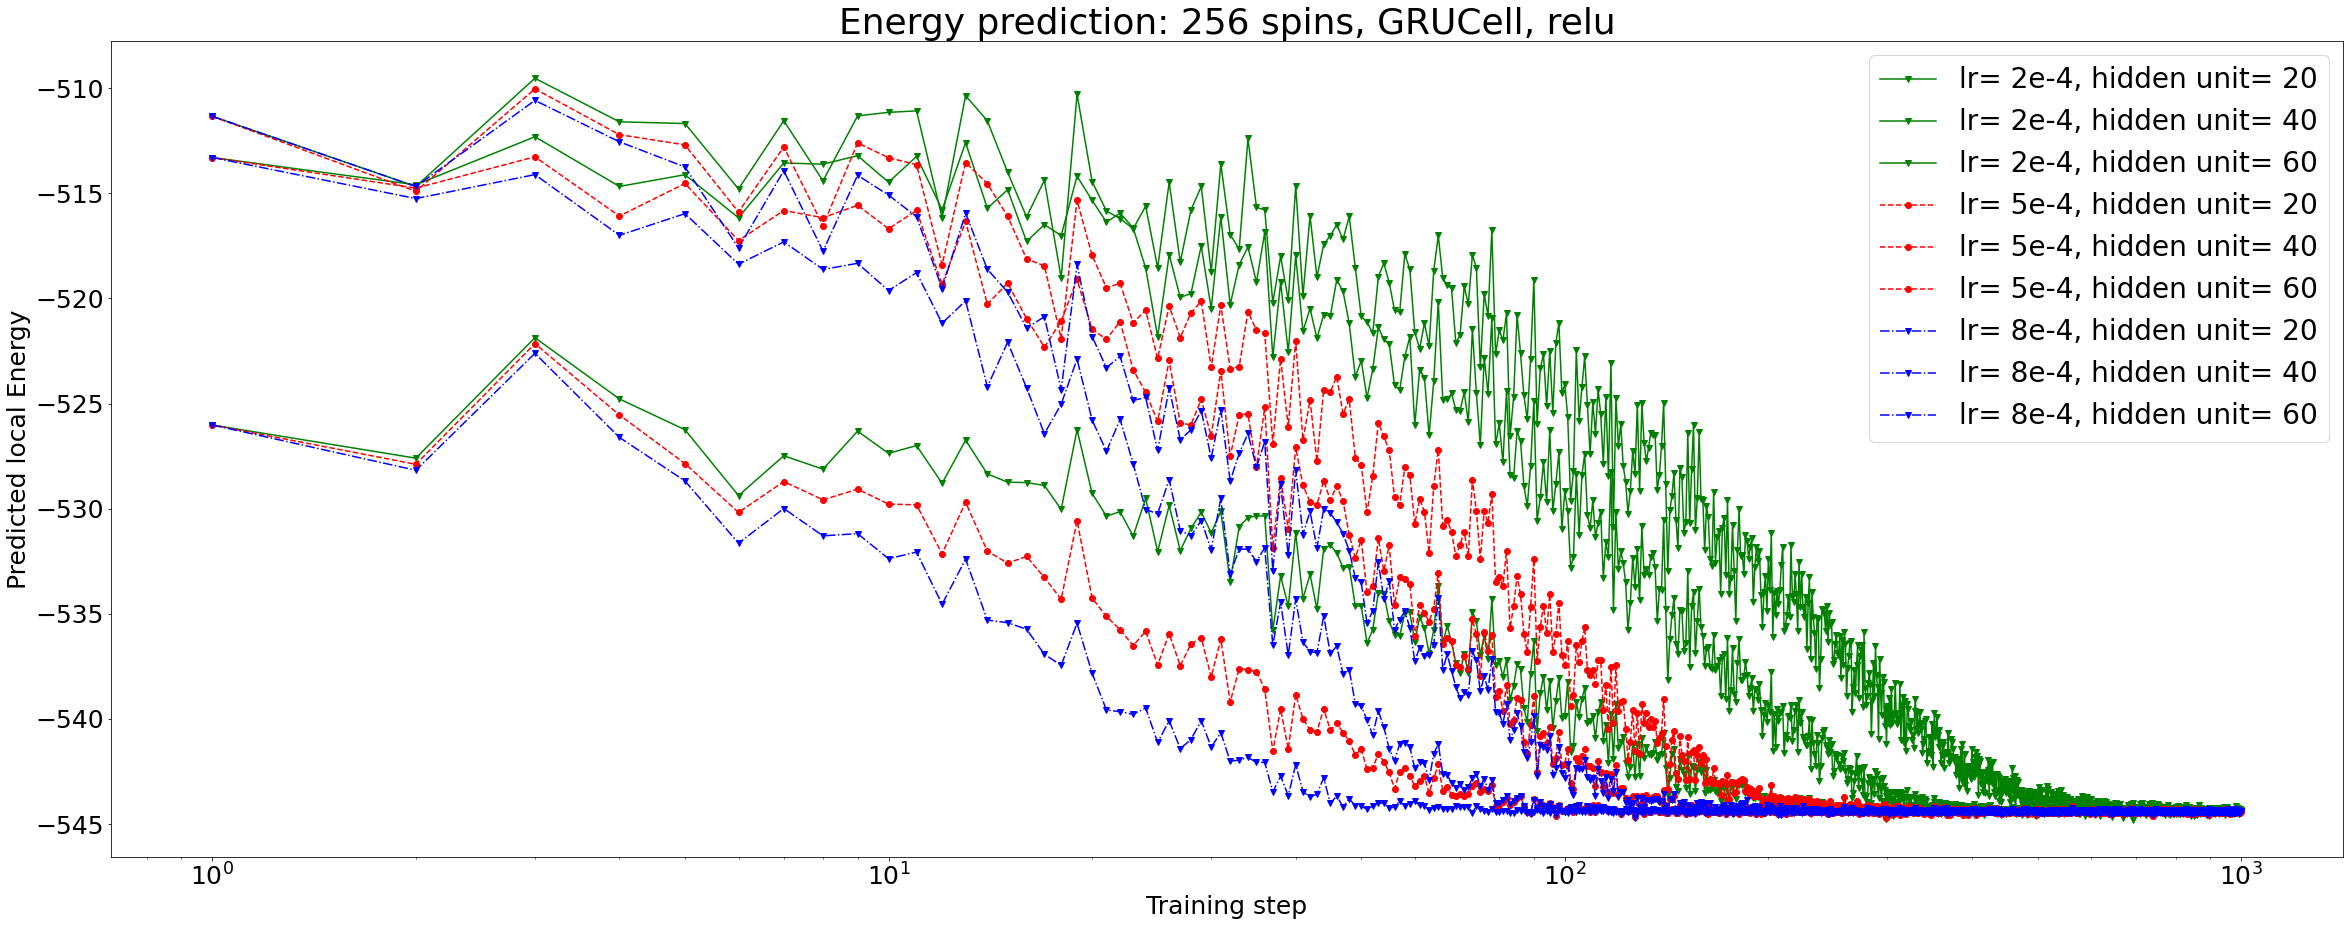

In [54]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 能量震盪收斂圖
rcParams['axes.labelsize']  = 20 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 30
rcParams['legend.fontsize'] = 28
rcParams['xtick.labelsize'] = 25
rcParams['ytick.labelsize'] = 25

      
fig, ax = plt.subplots(figsize=(40, 15))
ax.plot(np.arange(1, len(Energy_256_2_20)+1), Energy_256_2_20, "vg-", label="lr= 2e-4, hidden unit= 20")
ax.plot(np.arange(1, len(Energy_256_2_40)+1), Energy_256_2_40, "vg-", label="lr= 2e-4, hidden unit= 40")
ax.plot(np.arange(1, len(Energy_256_2_60)+1), Energy_256_2_60, "vg-", label="lr= 2e-4, hidden unit= 60")

ax.plot(np.arange(1, len(Energy_256_5_20)+1), Energy_256_5_20, "or--", label="lr= 5e-4, hidden unit= 20")
ax.plot(np.arange(1, len(Energy_256_5_40)+1), Energy_256_5_40, "or--", label="lr= 5e-4, hidden unit= 40")
ax.plot(np.arange(1, len(Energy_256_5_60)+1), Energy_256_5_60, "or--", label="lr= 5e-4, hidden unit= 60")

ax.plot(np.arange(1, len(Energy_256_8_20)+1), Energy_256_8_20, "vb-.", label="lr= 8e-4, hidden unit= 20")
ax.plot(np.arange(1, len(Energy_256_8_40)+1), Energy_256_8_40, "vb-.", label="lr= 8e-4, hidden unit= 40")
ax.plot(np.arange(1, len(Energy_256_8_60)+1), Energy_256_8_60, "vb-.", label="lr= 8e-4, hidden unit= 60")


plt.title("Energy prediction: 256 spins, GRUCell, relu", fontsize = 36)
ax.set_xlabel(r'Training step', fontsize = 25)
ax.set_ylabel('Predicted local Energy', fontsize = 25)
ax.set_xscale('log')
plt.legend()
plt.show()
print("\n")

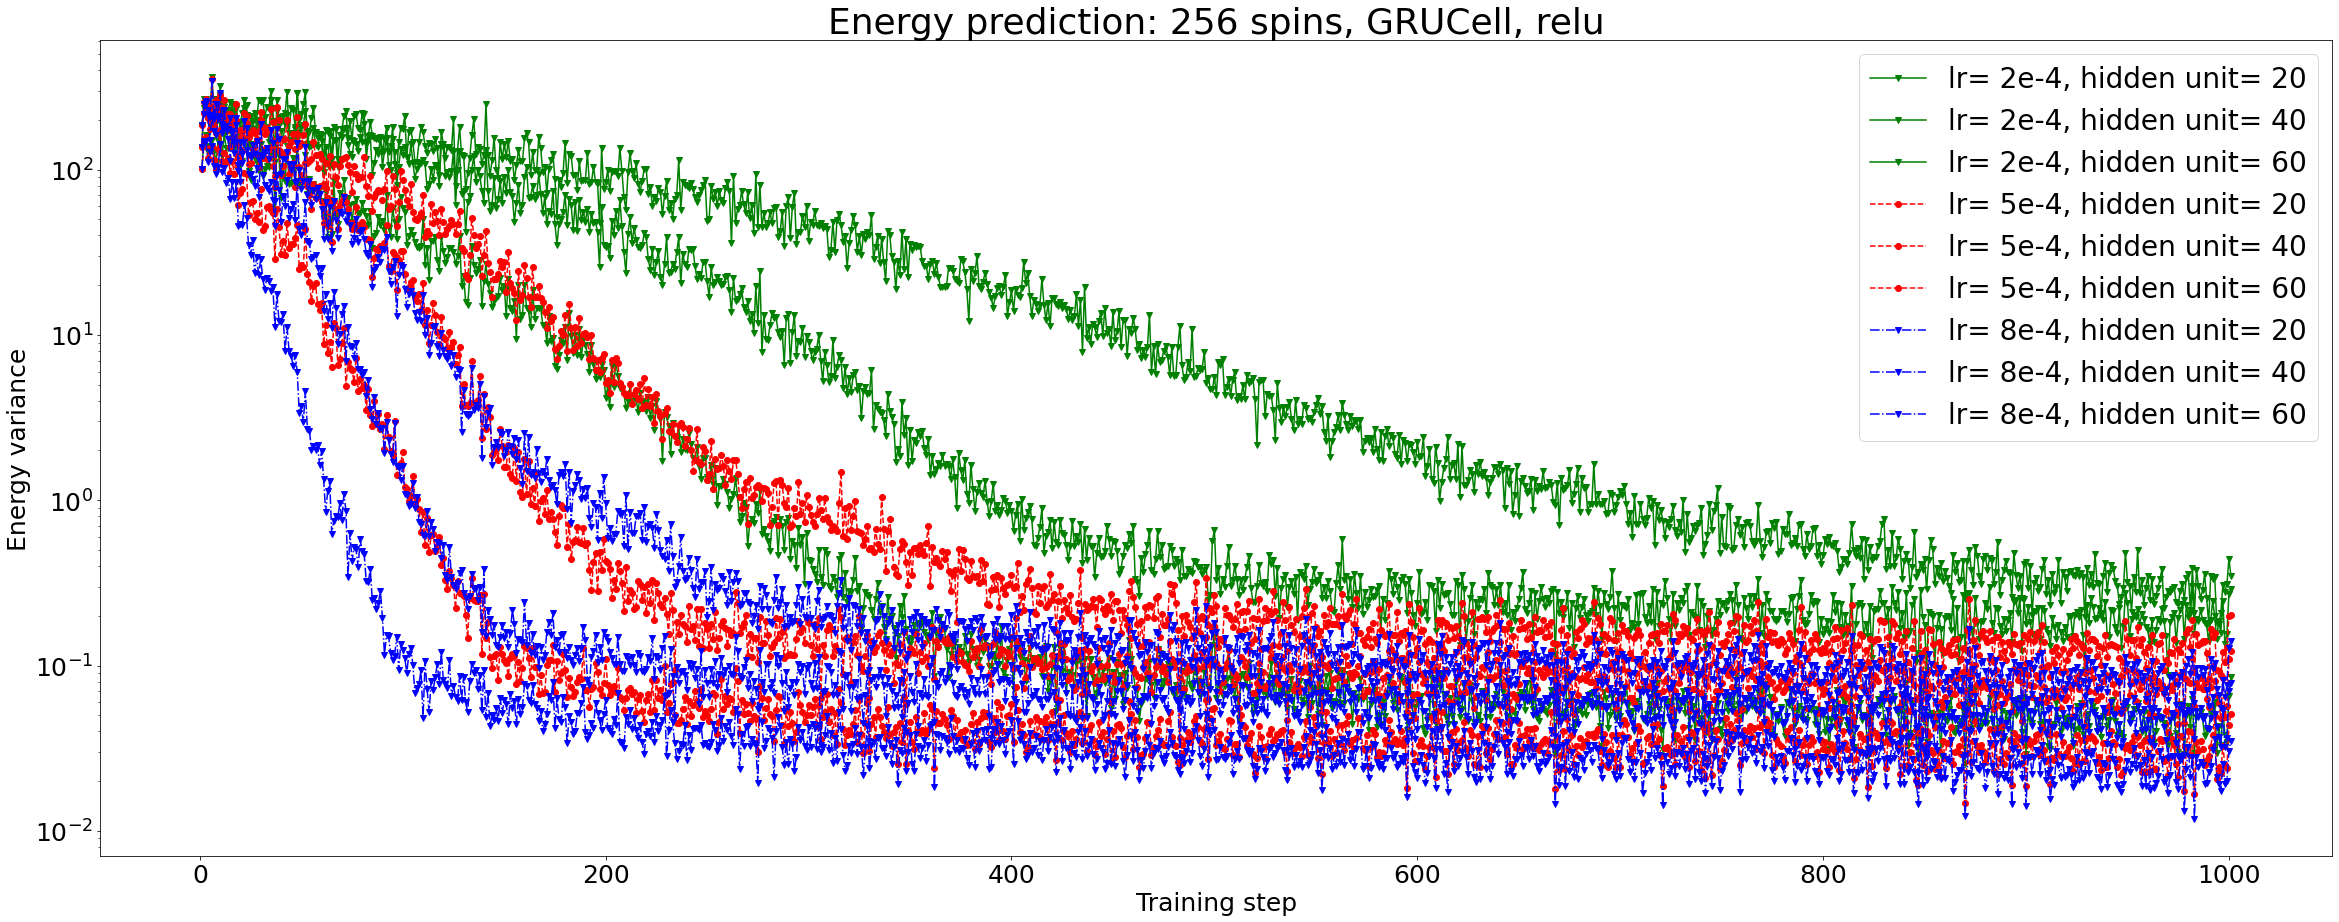

In [55]:
# Variacnce plot
# spin = 256
rcParams['axes.labelsize']  = 40 #座標上的label大小
rcParams['font.serif']      = ['Computer Modern']
rcParams['font.size']       = 30
rcParams['legend.fontsize'] = 28 # 圖標的大小
rcParams['xtick.labelsize'] = 25
rcParams['ytick.labelsize'] = 25


fig, ax = plt.subplots(figsize=(40,15))

ax.semilogy(np.arange(1, len(Energy_256_2_20)+1), varEnergy_256_2_20, "vg-", label="lr= 2e-4, hidden unit= 20")
ax.semilogy(np.arange(1, len(Energy_256_2_40)+1), varEnergy_256_2_40, "vg-", label="lr= 2e-4, hidden unit= 40")
ax.semilogy(np.arange(1, len(Energy_256_2_60)+1), varEnergy_256_2_60, "vg-", label="lr= 2e-4, hidden unit= 60")

ax.semilogy(np.arange(1, len(Energy_256_5_20)+1), varEnergy_256_5_20, "or--", label="lr= 5e-4, hidden unit= 20")
ax.semilogy(np.arange(1, len(Energy_256_5_40)+1), varEnergy_256_5_40, "or--", label="lr= 5e-4, hidden unit= 40")
ax.semilogy(np.arange(1, len(Energy_256_5_60)+1), varEnergy_256_5_60, "or--", label="lr= 5e-4, hidden unit= 60")

ax.semilogy(np.arange(1, len(Energy_256_8_20)+1), varEnergy_256_8_20, "vb-.", label="lr= 8e-4, hidden unit= 20")
ax.semilogy(np.arange(1, len(Energy_256_8_40)+1), varEnergy_256_8_40, "vb-.", label="lr= 8e-4, hidden unit= 40")
ax.semilogy(np.arange(1, len(Energy_256_8_60)+1), varEnergy_256_8_60, "vb-.", label="lr= 8e-4, hidden unit= 60")


plt.title("Energy prediction: 256 spins, GRUCell, relu", fontsize = 36)
ax.set_xlabel(r'Training step', fontsize = 25)
ax.set_ylabel('Energy variance', fontsize = 25)
plt.legend()
plt.show()
print("\n")



* Best models of different #spin:
* #32 spins:
* Energy_GRUCell_relu, varEnergy_GRUCell_relu         = run_1DTFIM(RNNtype = 1, activationType = 1, numsteps = 1000, systemsize = 32,  Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
* #64 spins:
* Energy_GRUCell_sigmoid, varEnergy_GRUCell_sigmoid   = run_1DTFIM(RNNtype = 1, activationType = 3, numsteps = 1000, systemsize = 64,  Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
* #128 spins:
* Energy_GRUCell_sigmoid, varEnergy_GRUCell_sigmoid   = run_1DTFIM(RNNtype = 1, activationType = 3, numsteps = 1000, systemsize = 128, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)
* #256 spins:
* Energy_GRUCell_relu, varEnergy_GRUCell_relu         = run_1DTFIM(RNNtype = 1, activationType = 1, numsteps = 1000, systemsize = 256, Bx = +2, num_units = 40,  num_layers = 1, numsamples = 50, learningrate = 5e-4, seed = 111)